In [2]:
import xarray as xr
import numpy as np
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
from scipy.interpolate import interp1d

In [4]:
path= "Guangzhou_site_NNDMN.xlsx"
observation = pd.read_excel(path,sheet_name='Sheet2')

PM = pd.read_excel('speciesGZ.xlsx')

In [6]:
date = ['01','02','03','04','05','06','07','08','09','10','11','12']
#date = ['06','07','08','09','10']
file = [0] * len(date)
data16 = [0] * (len(date))
for i in range(len(date)):
    #date[i]
    file[i] = '0.5x0.625/2016/GEOSChem.SpeciesConc.2016'+date[i]+'01_0000z.nc4'

    data16[i] = xr.open_dataset(file[i])

In [7]:
date = ['01','02','03','04','05','06','07','08','09','10','11','12']
#date = ['01','02','03','04','05','06','07','08','09']
file = [0] * len(date)
data17 = [0] * (len(date))
for i in range(len(date)):
    #date[i]
    file[i] = '0.5x0.625/2017/GEOSChem.SpeciesConc.2017'+date[i]+'01_0000z.nc4'

    data17[i] = xr.open_dataset(file[i])

In [417]:
GZ = pd.read_excel('Observation/speciesGZ.xlsx')      #113.27,23.16,
NS = pd.read_excel('Observation/speciesNS.xlsx')      #13+36.25/60,22.75,
#GZ = pd.read_excel('Observation/speciesGZ.xlsx')


In [413]:
GZ.iloc[95:,6]      #NO3-

95          NaN
96     7.097130
97     7.863226
98     7.443996
99     4.244747
100    3.378955
101    1.933222
102    1.376419
103    1.013242
104    3.917853
105    1.160856
106    5.900408
107    4.800568
Name: NO3-, dtype: float64

In [10]:
data16[2]

<xarray.Dataset>
Dimensions:                 (time: 1, lev: 72, ilev: 73, lat: 30, nb: 2, lon: 48)
Coordinates:
  * time                    (time) datetime64[ns] 2016-03-01
  * lev                     (lev) float64 0.9925 0.9775 ... 2.635e-05 1.5e-05
  * ilev                    (ilev) float64 1.0 0.985 0.97 ... 2e-05 1e-05
  * lat                     (lat) float64 15.0 15.5 16.0 16.5 ... 28.5 29.0 29.5
  * lon                     (lon) float64 100.0 100.6 101.2 ... 128.8 129.4
Dimensions without coordinates: nb
Data variables: (12/380)
    lat_bnds                (lat, nb) float64 ...
    lon_bnds                (lon, nb) float64 ...
    hyam                    (lev) float64 ...
    hybm                    (lev) float64 ...
    hyai                    (ilev) float64 ...
    hybi                    (ilev) float64 ...
    ...                      ...
    SpeciesConcVV_ALK4      (time, lev, lat, lon) float32 ...
    SpeciesConcVV_ALD2      (time, lev, lat, lon) float32 ...
    SpeciesConcVV_AERI      (time, lev, lat, lon) float32 ...
    SpeciesConcVV_ACR       (time, lev, lat, lon) float32 ...
    SpeciesConcVV_ACTA      (time, lev, lat, lon) float32 ...
    SpeciesConcVV_ACET      (time, lev, lat, lon) float32 ...
Attributes:
    title:                           GEOS-Chem diagnostic collection: Species...
    history:                         
    format:                          NetCDF-4
    conventions:                     COARDS
    ProdDateTime:                    
    reference:                       www.geos-chem.org; wiki.geos-chem.org
    contact:                         GEOS-Chem Support Team (geos-chem-suppor...
    simulation_start_date_and_time:  2016-01-01 00:00:00z
    simulation_end_date_and_time:    2017-02-01 00:00:00z

In [13]:
no216 = [0] *len(data16)

for i in range(len(no216)):
    no216[i] = data16[i]['SpeciesConcVV_NO2'].isel(time=0, lev=1)

In [15]:
no217 = [0] *len(data17)

for i in range(len(no217)):
    no217[i] = data17[i]['SpeciesConcVV_NO2'].isel(time=0, lev=1)

In [277]:
hno316 = [0] *len(data16)

for i in range(len(hno316)):
    hno316[i] = data16[i]['SpeciesConcVV_HNO3'].isel(time=0, lev=1)

hno317 = [0] *len(data17)

for i in range(len(hno317)):
    hno317[i] = data17[i]['SpeciesConcVV_HNO3'].isel(time=0, lev=1)

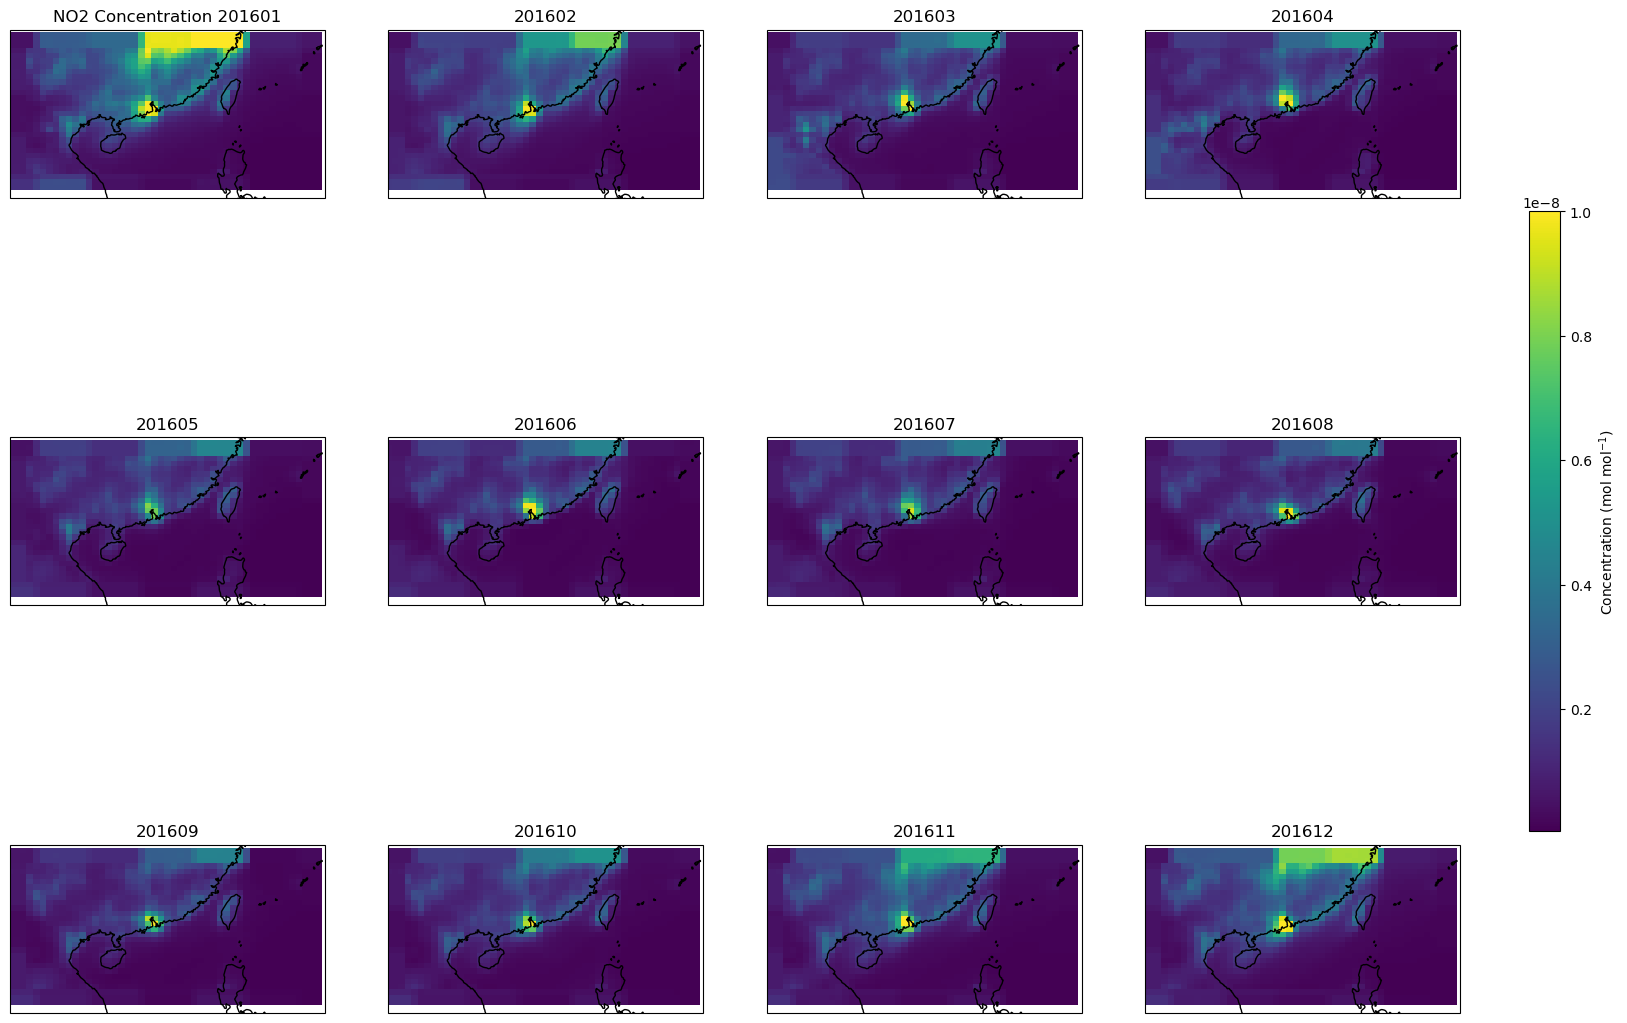

In [17]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['NO2 Concentration 201601', '201602', '201603', 
          '201604', '201605', '201606', 
          '201607', '201608', '201609','201610','201611','201612']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), no216, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=1e-8, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 14, 30]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

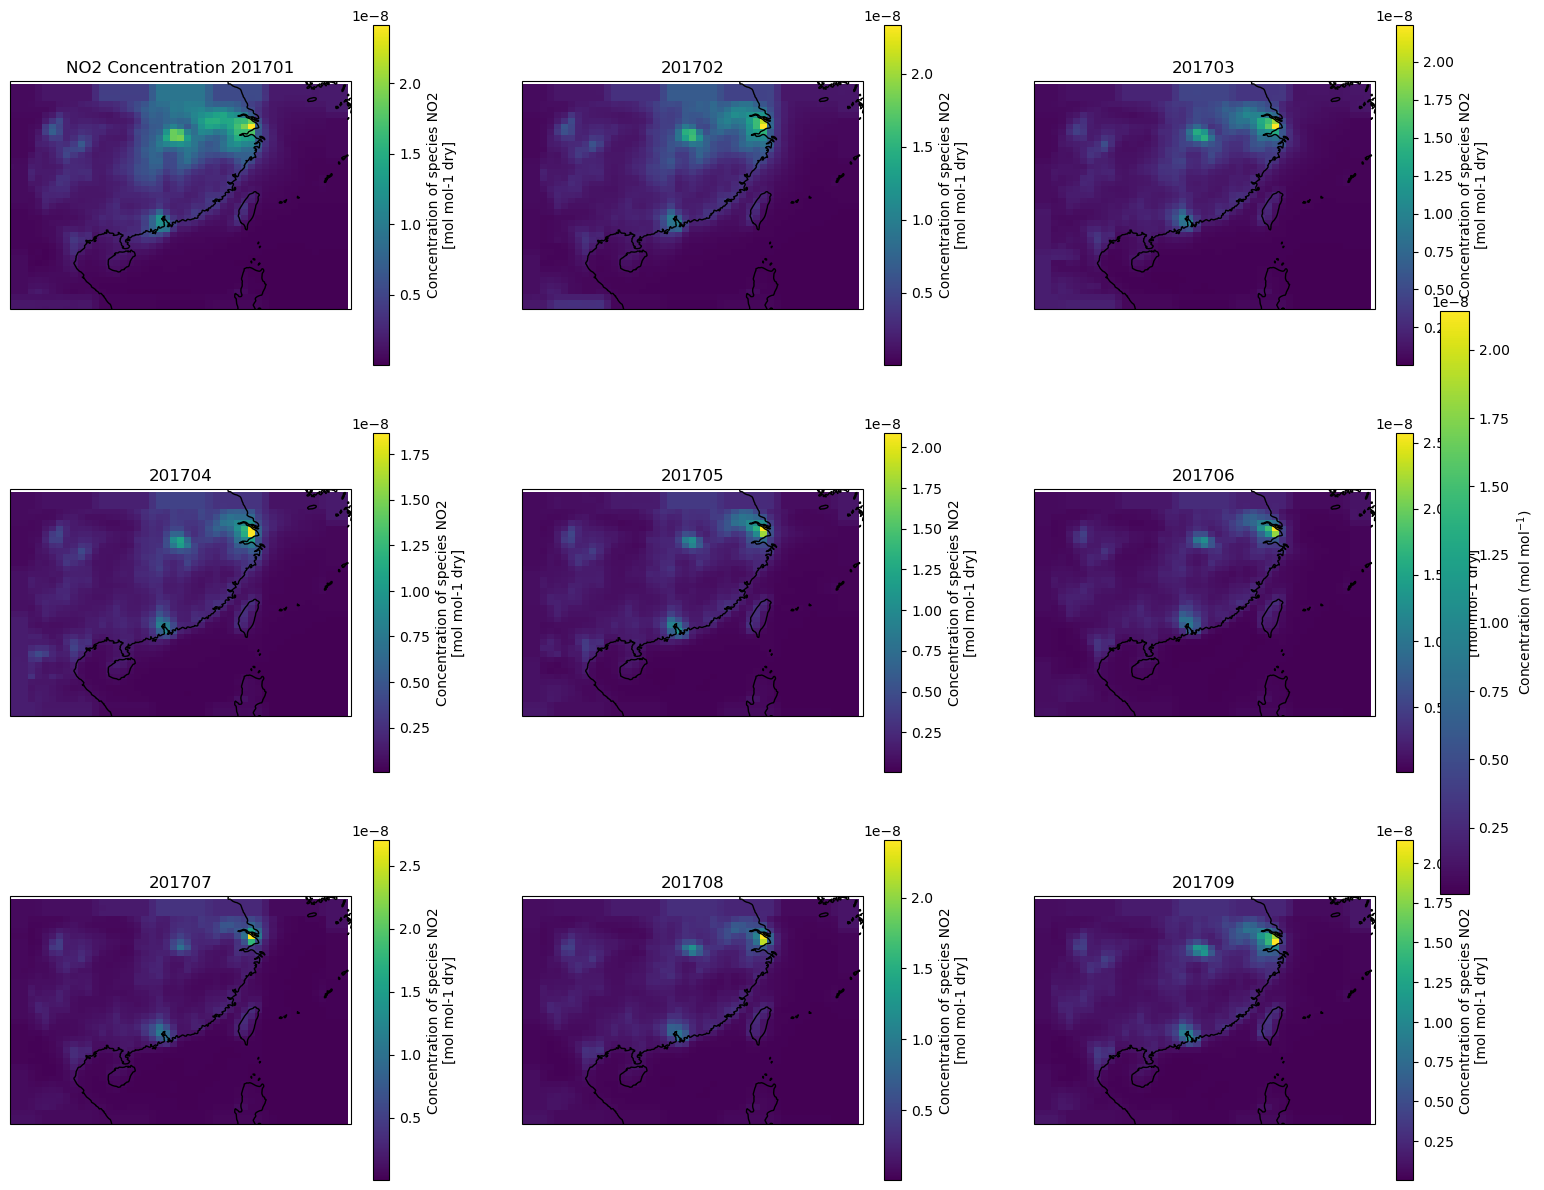

In [19]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
# titles = ['NO2 Concentration 201601', '201602', '201603', 
#           ['201704', '201705', '201706', 
#           '201707', '201708', '201709','201710','201611','201612']
titles = ['NO2 Concentration 201701', '201702', '201703', '201704','201705','201706',
          '201707', '201708', '201709']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), no217, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')#,vmax=6e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 15, 35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

In [23]:
no16 = [0] *len(data16)

for i in range(len(no16)):
    no16[i] = data16[i]['SpeciesConcVV_NO'].isel(time=0, lev=1)

In [25]:
no17 = [0] *len(data17)

for i in range(len(no17)):
    no17[i] = data17[i]['SpeciesConcVV_NO'].isel(time=0, lev=1)

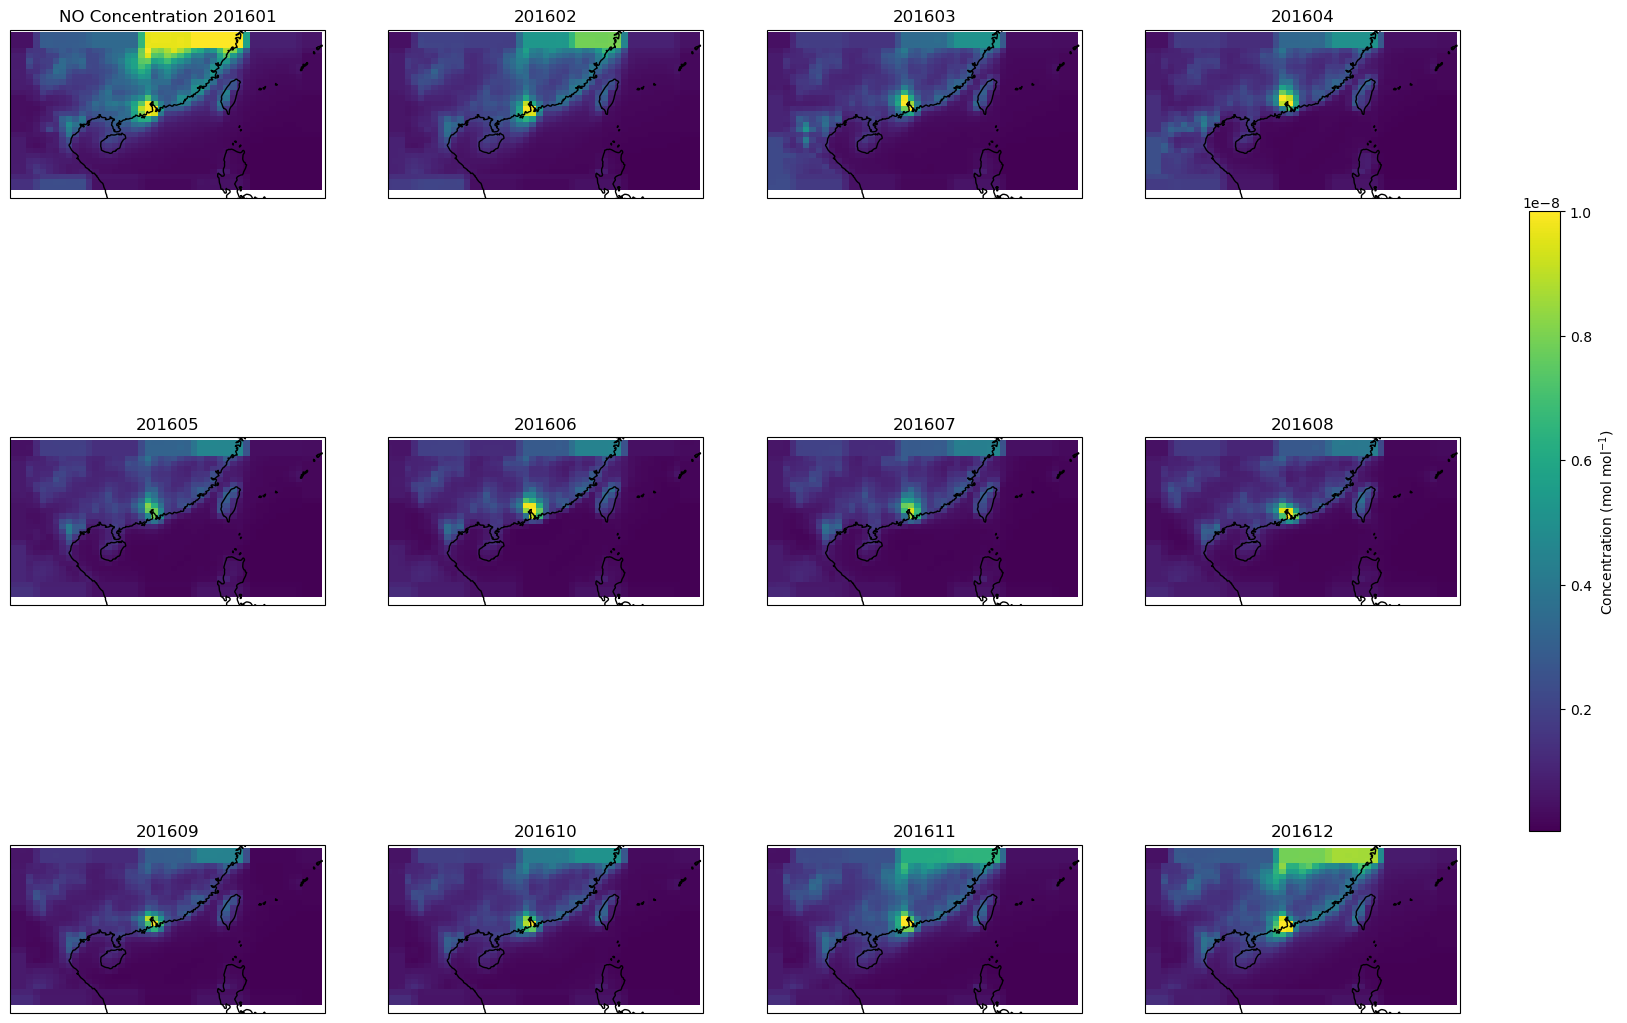

In [27]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['NO Concentration 201601', '201602', '201603', 
          '201604', '201605', '201606', 
          '201607', '201608', '201609','201610','201611','201612']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), no216, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=1e-8, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 14, 30]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

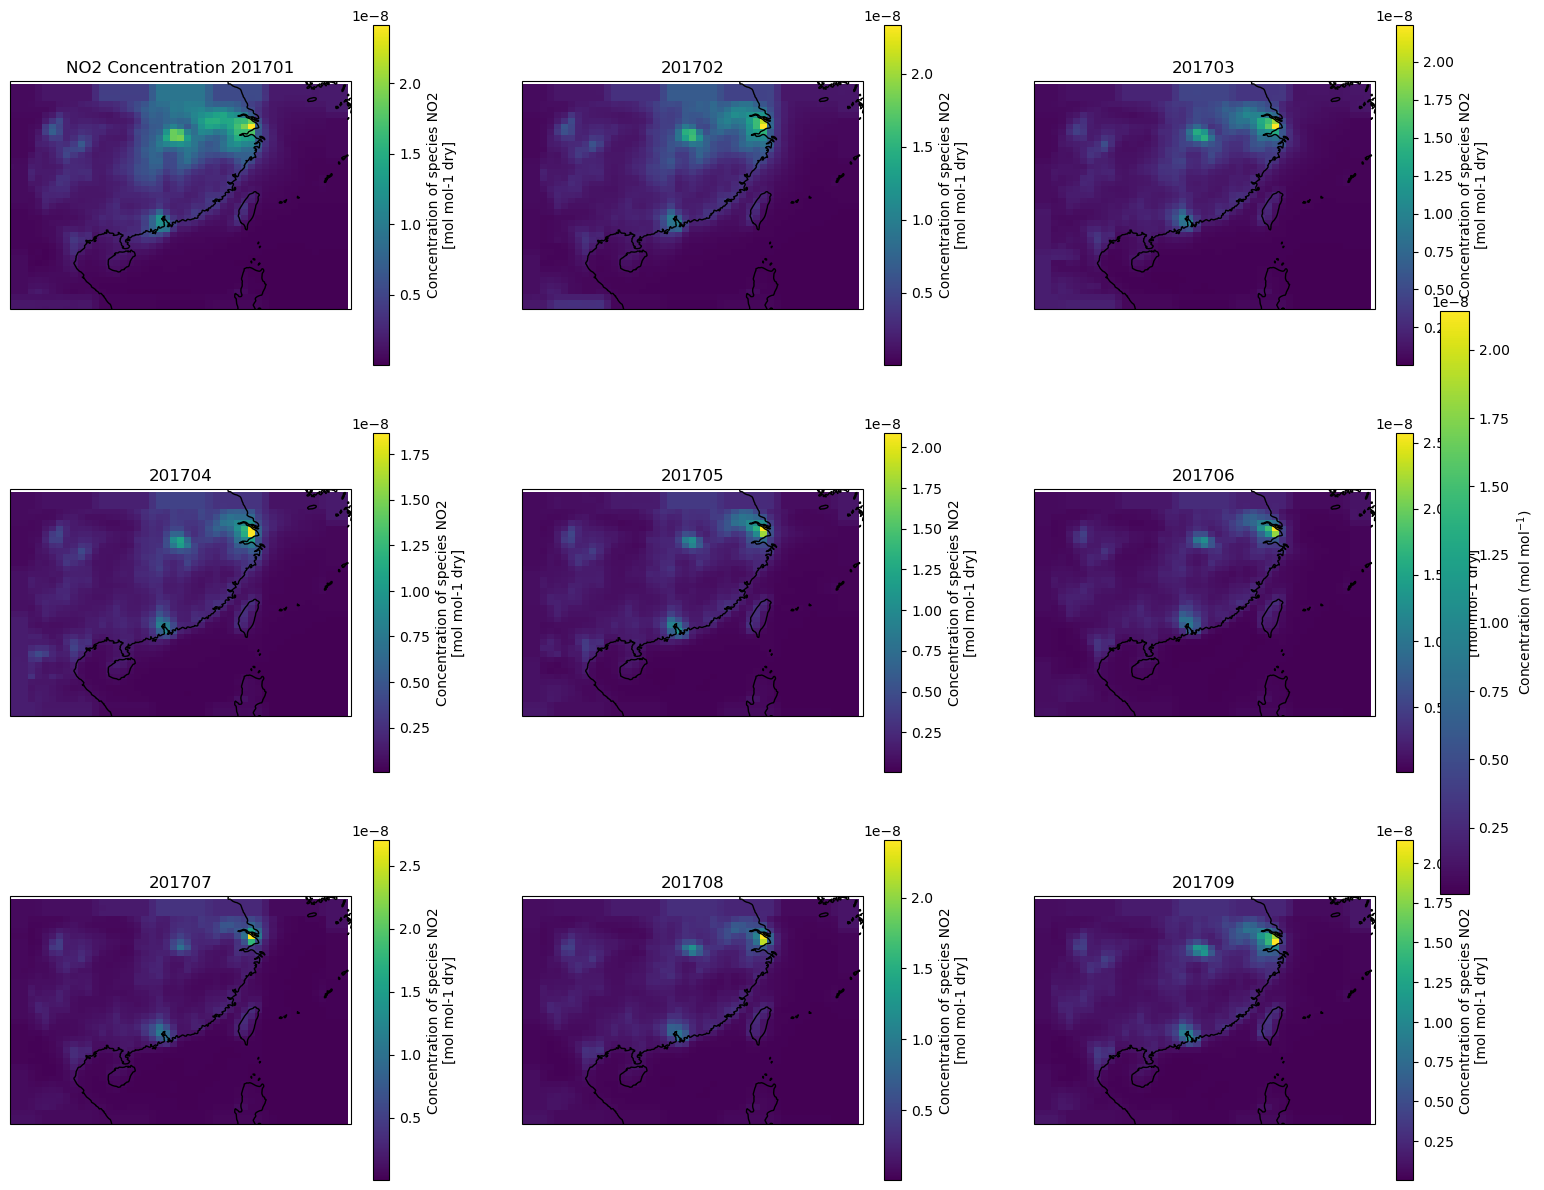

In [28]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
# titles = ['NO2 Concentration 201601', '201602', '201603', 
#           ['201704', '201705', '201706', 
#           '201707', '201708', '201709','201710','201611','201612']
titles = ['NO2 Concentration 201701', '201702', '201703', '201704','201705','201706',
          '201707', '201708', '201709']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), no217, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis')#,vmax=6e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 15, 35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

In [368]:
path = '../data/全国空气质量/站点列表-2016.11.07起_副本.xlsx'

cord = pd.read_excel(path)
cord

co = cord.iloc[341:397,:]
CO = co.set_index('监测点编码')
#CO.T

## Species NO3-

In [30]:
no316 = [0] *len(data16)

for i in range(len(no316)):
    no316[i] = data16[i]['SpeciesConcVV_NIT'].isel(time=0, lev=1)


no317 = [0] *len(data17)

for i in range(len(no317)):
    no317[i] = data17[i]['SpeciesConcVV_NIT'].isel(time=0, lev=1)

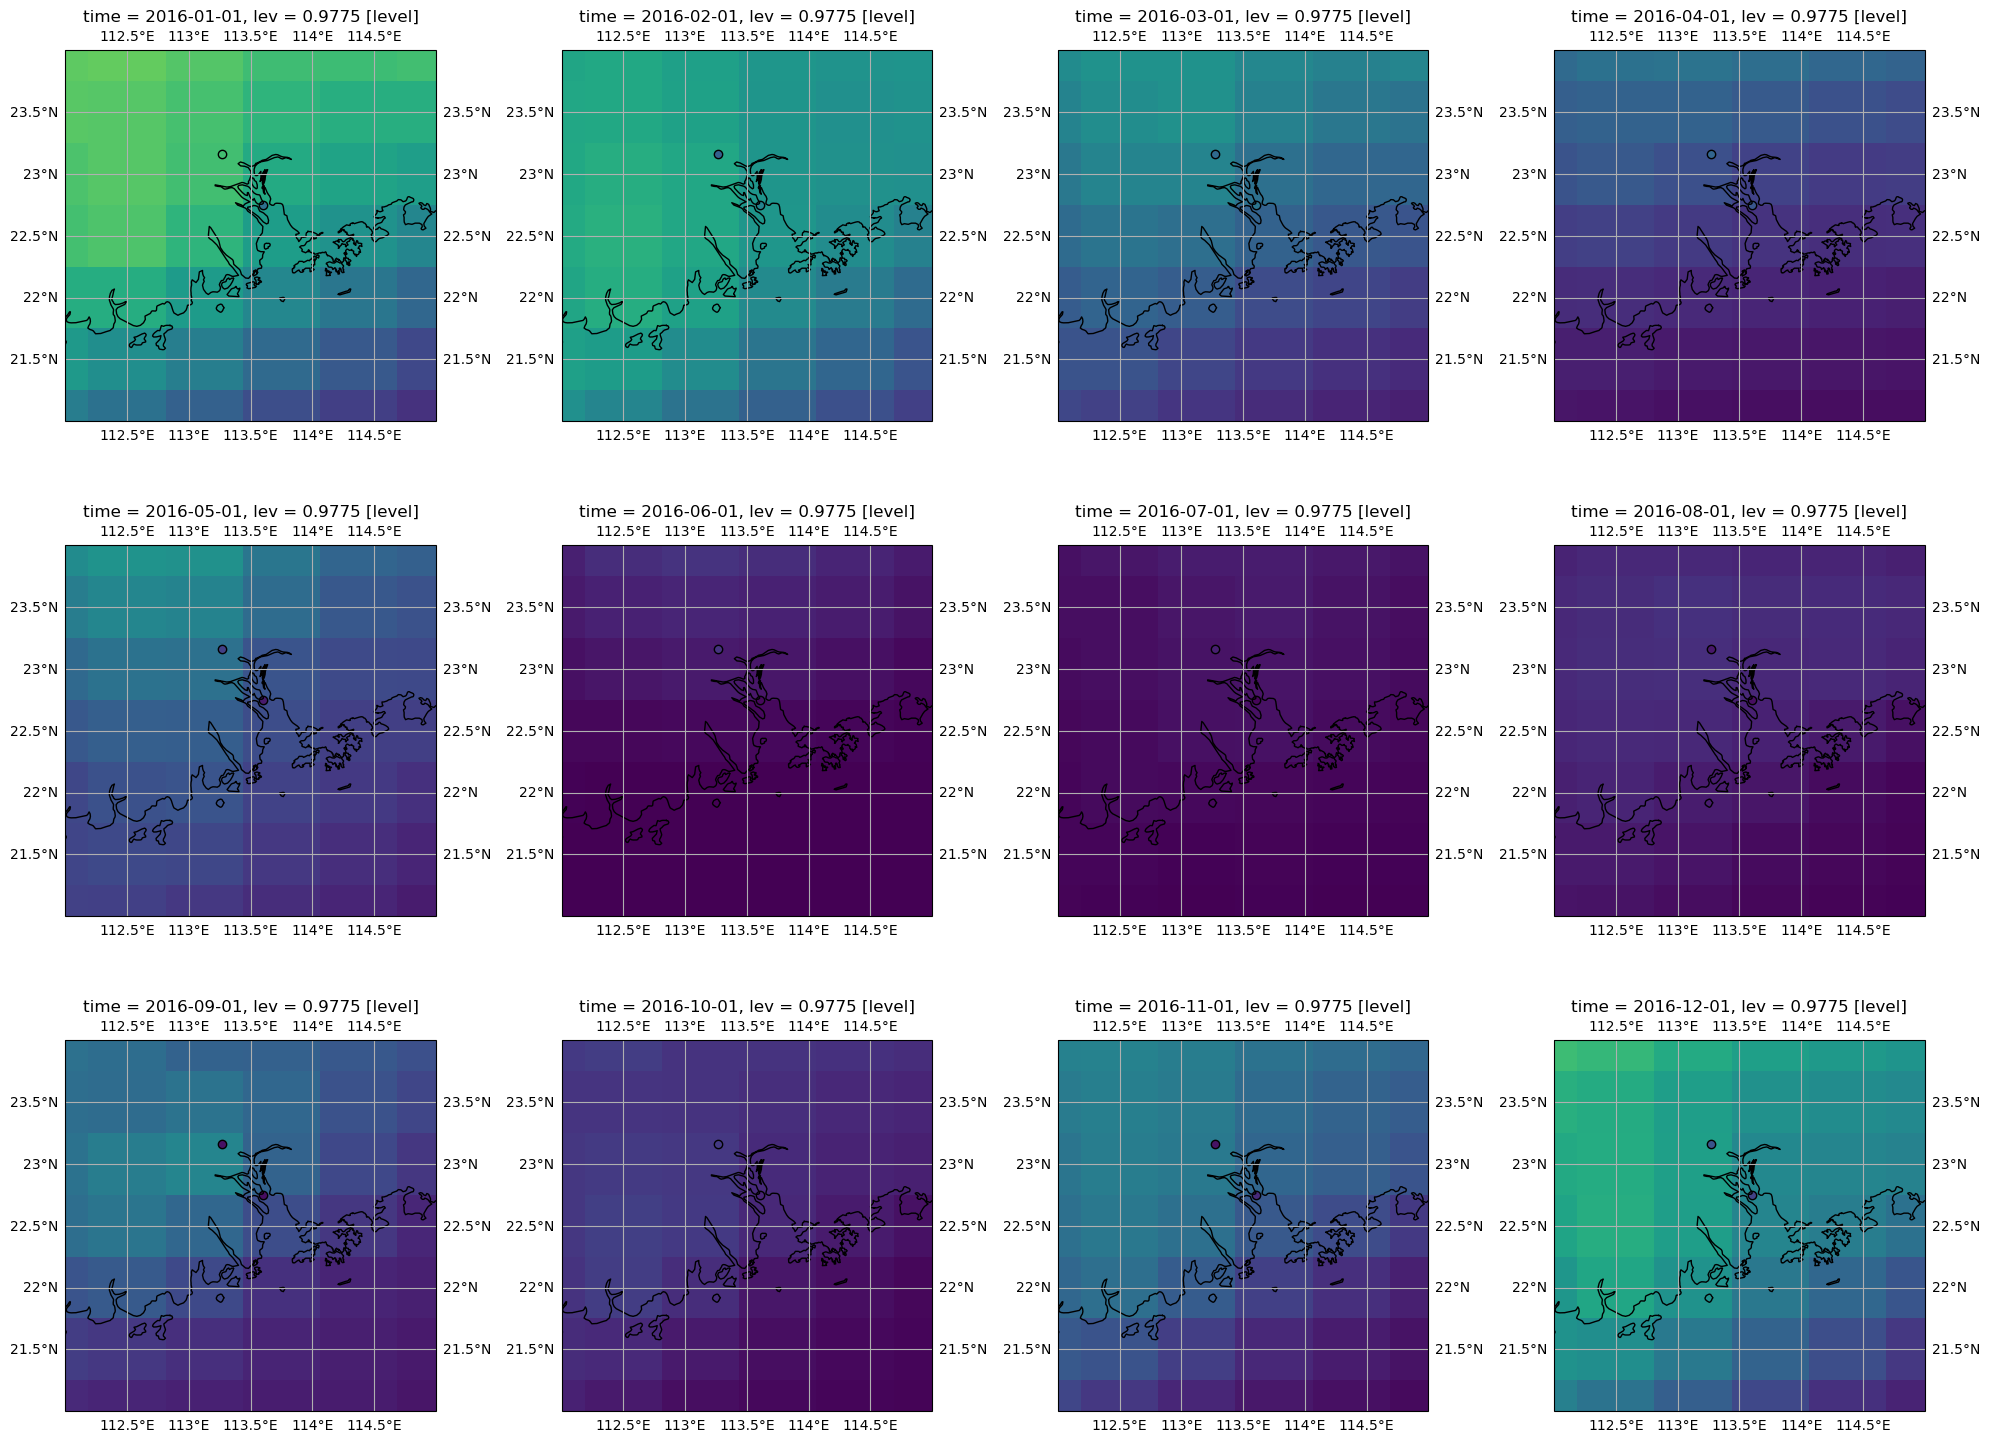

In [425]:
# Create a figure with subplots
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})


# Plot each subplot
for i in range(12):
    # Flatten the axis array for ease of iteration
    axs = axs.flatten()
    ax = axs[i]
    
    # Plot the SO2_mod data on the map
    mesh = (no316[i]*(62/22.4)*1e9).plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', vmax=23,add_colorbar=False)
    
    # Add coastlines and gridlines
    ax.set_extent([112, 115, 21, 24])
    ax.coastlines()
    ax.gridlines(draw_labels=True)
    
    # Scatter plot the coordinates and mean values
    
    ax.scatter(113.27,23.16, c=GZ.iloc[i+95, 6], cmap='viridis', vmin=0, vmax=23, edgecolor='black')
    ax.scatter(113+36.25/60,22.75, c=NS.iloc[i+95, 6], cmap='viridis', vmin=0, vmax=23, edgecolor='black')


# cbar = fig.colorbar(mesh, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
# cbar.set_label('Concentration (ug mol$^{-3}$)')
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

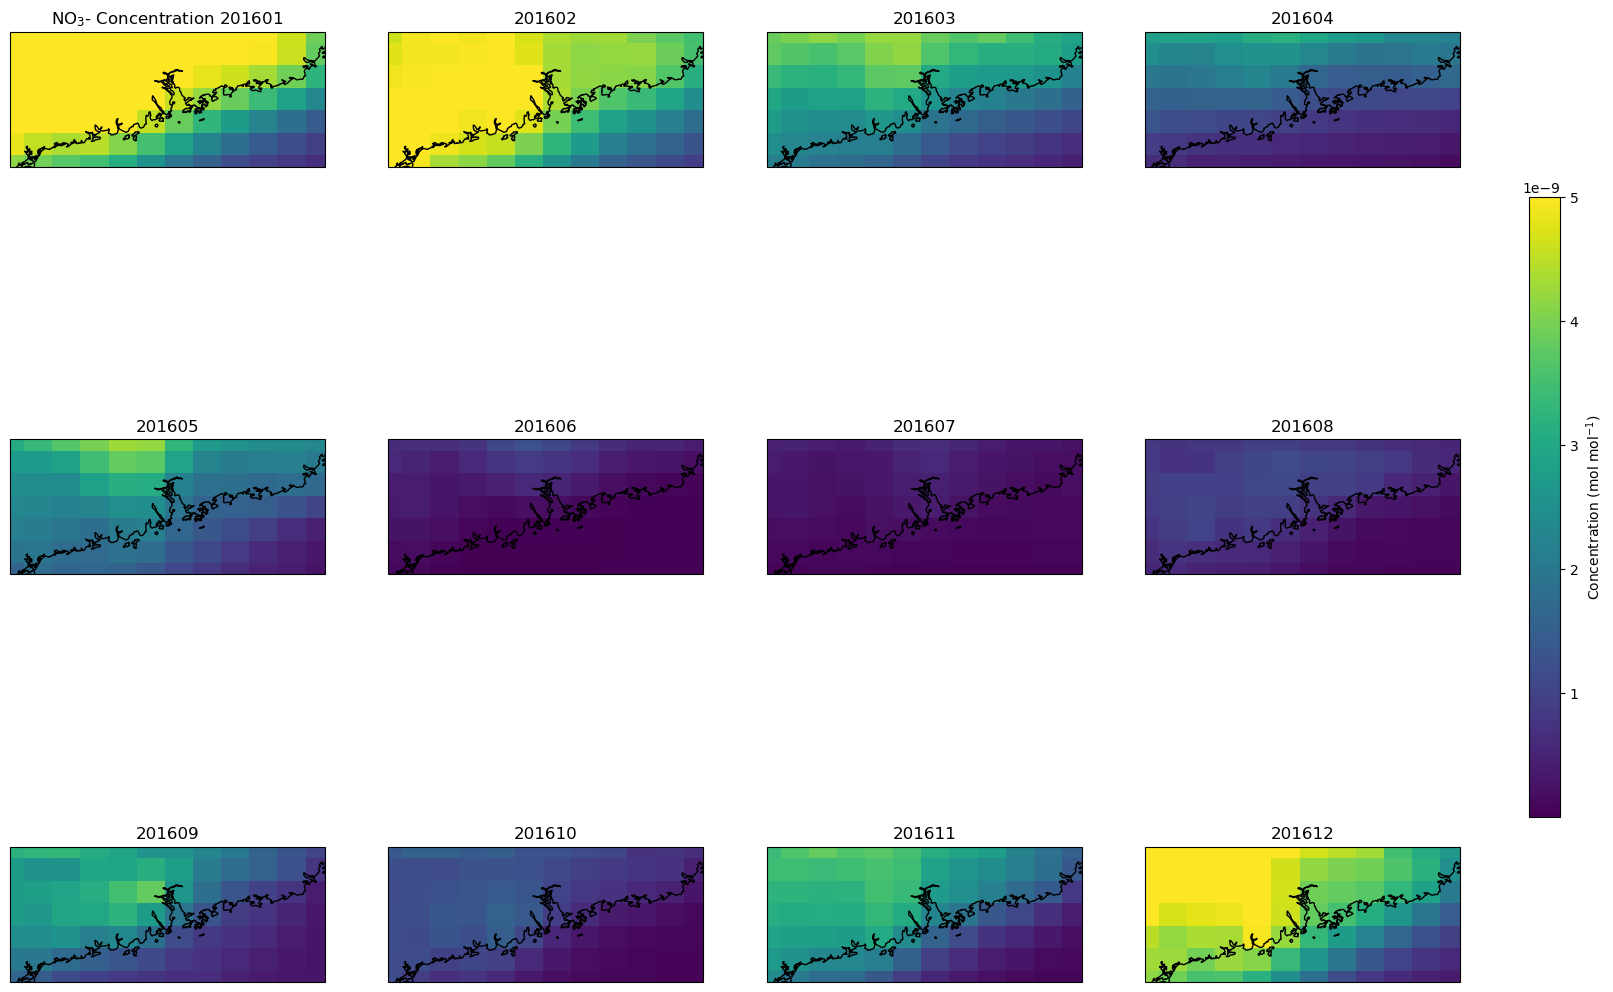

In [383]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['NO$_3$- Concentration 201601', '201602', '201603', 
          '201604', '201605', '201606', 
          '201607', '201608', '201609','201610','201611','201612']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), no316, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=5e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    #extent = [100, 130.0, 15, 35]
    extent=[110,117,21,24]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    ##observation.iloc[69:93,11]
    # for j in range(4, 56):
    #     ax.scatter(CO.T.iloc[2, j], CO.T.iloc[3, j], c=meanso2.iloc[i, j], cmap='viridis', vmin=0, vmax=23, edgecolor='black')

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

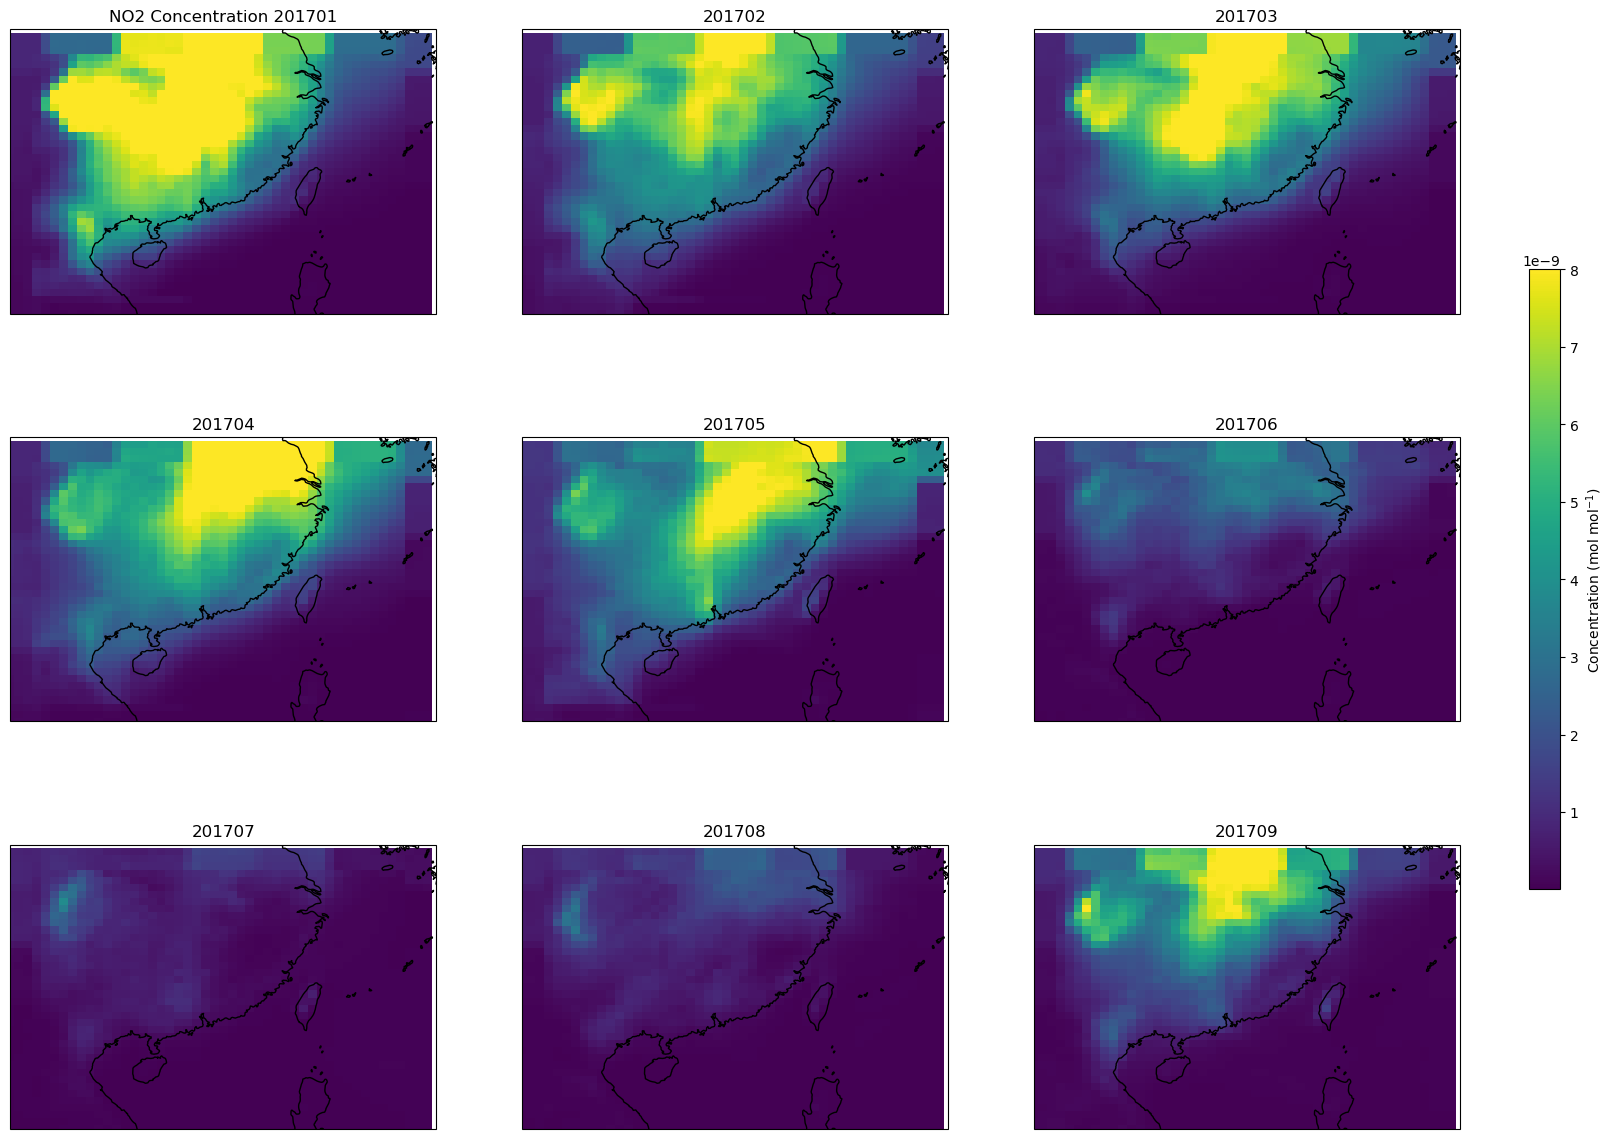

In [33]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
# titles = ['NO2 Concentration 201601', '201602', '201603', 
#           ['201704', '201705', '201706', 
#           '201707', '201708', '201709','201710','201611','201612']
titles = ['NO2 Concentration 201701', '201702', '201703', '201704','201705','201706',
          '201707', '201708', '201709']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), no317, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=8e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 15, 35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

## Species SO2

In [38]:
so216 = [0] *len(data16)

for i in range(len(so216)):
    so216[i] = data16[i]['SpeciesConcVV_SO2'].isel(time=0, lev=1)

In [39]:
so217 = [0] *len(data17)

for i in range(len(so217)):
    so217[i] = data17[i]['SpeciesConcVV_SO2'].isel(time=0, lev=1)

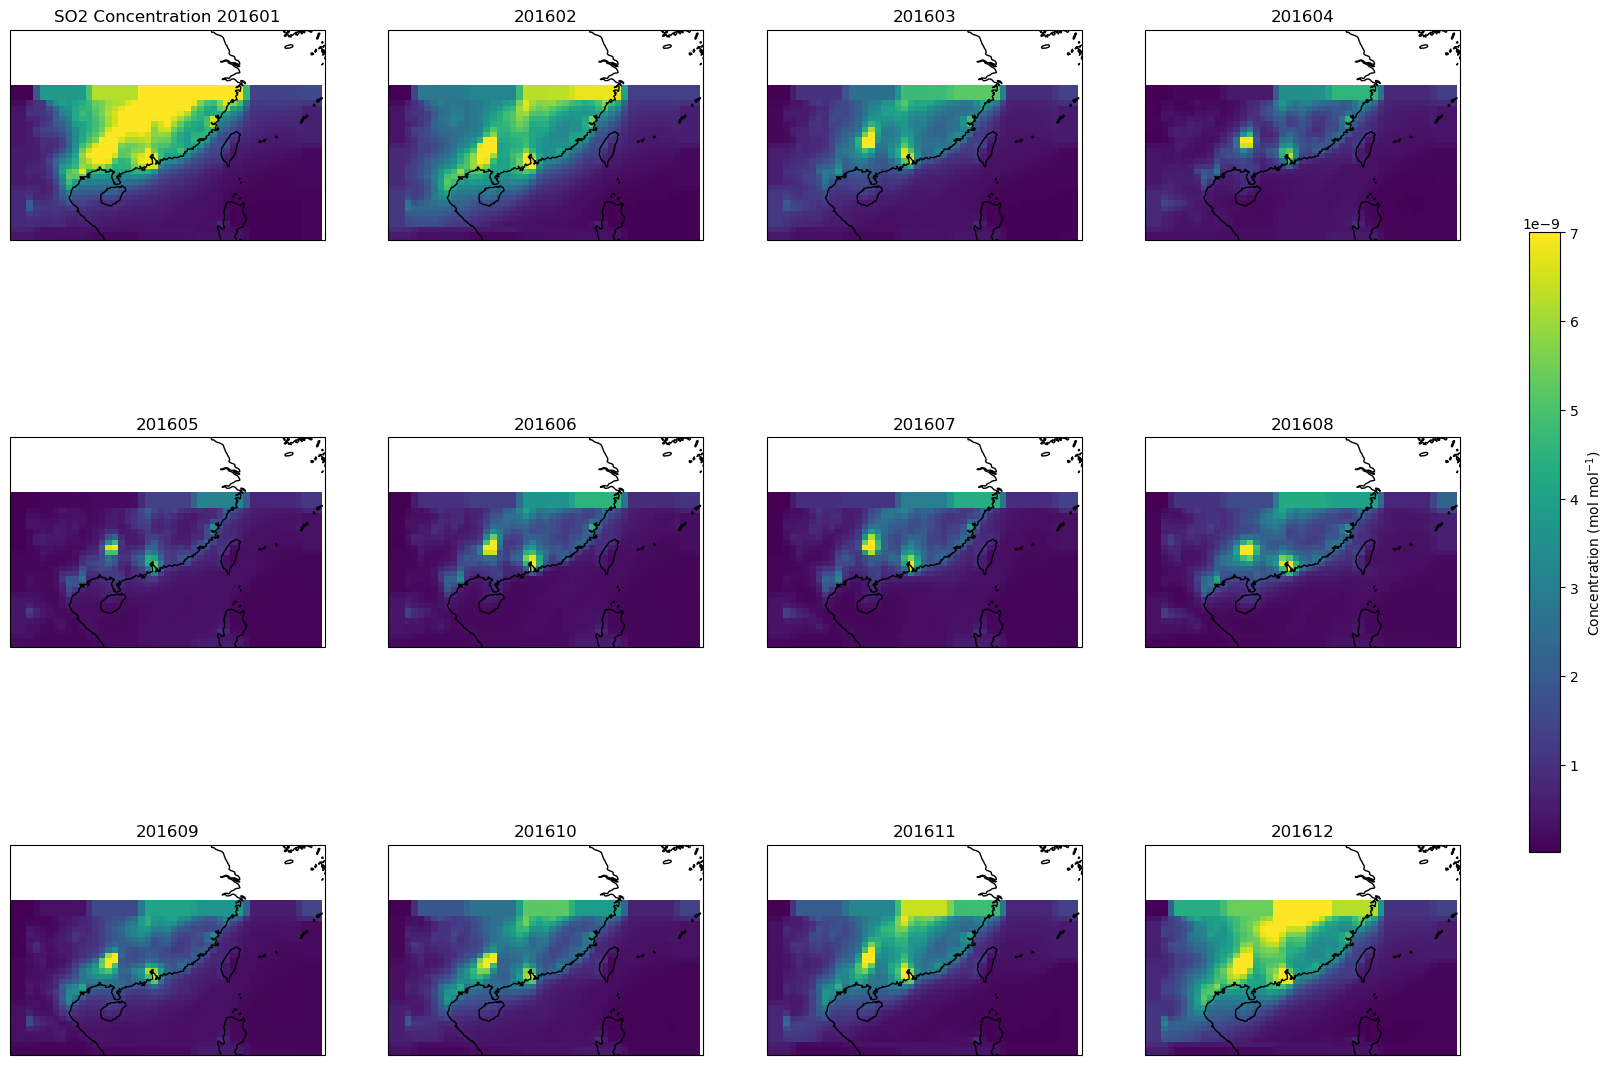

In [40]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['SO2 Concentration 201601', '201602', '201603', 
          '201604', '201605', '201606', 
          '201607', '201608', '201609','201610','201611','201612']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), so216, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=7e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130, 15,35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

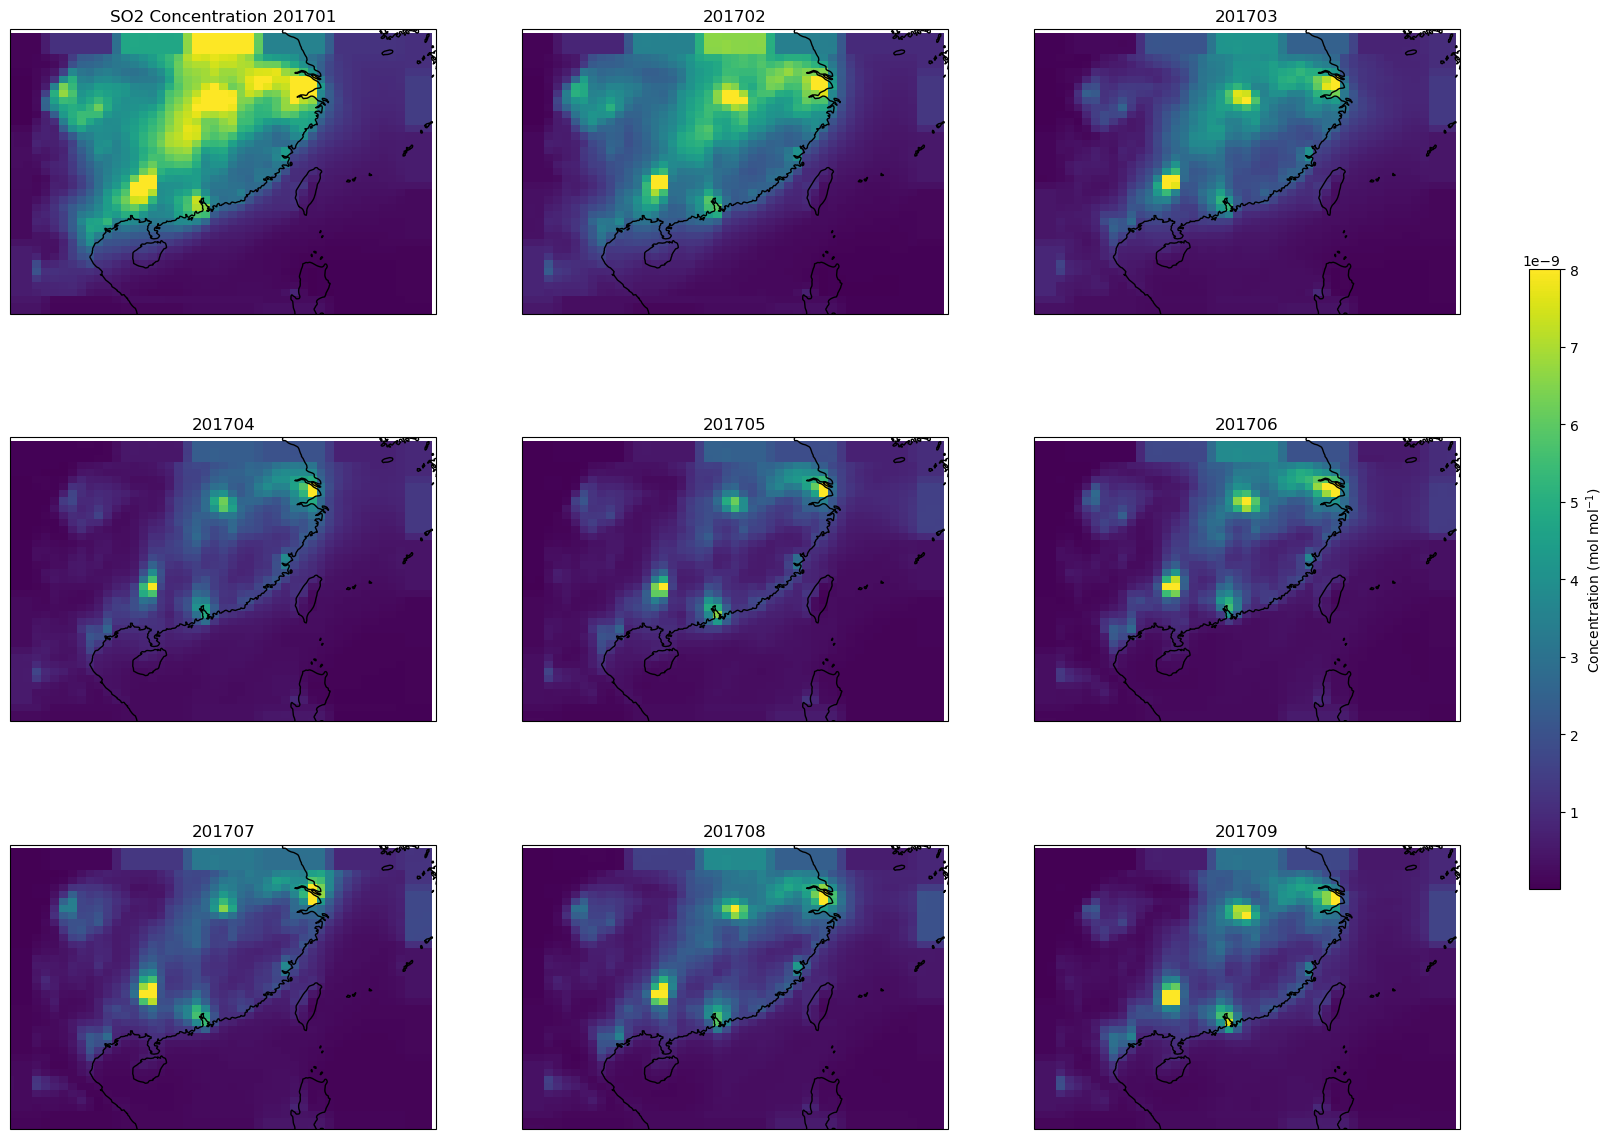

In [360]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
# titles = ['NO2 Concentration 201601', '201602', '201603', 
#           ['201704', '201705', '201706', 
#           '201707', '201708', '201709','201710','201611','201612']
titles = ['SO2 Concentration 201701', '201702', '201703', '201704','201705','201706',
          '201707', '201708', '201709']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), so217, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=8e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 15, 35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

## Species SO4=

In [44]:
so416 = [0] *len(data16)

for i in range(len(so416)):
    so416[i] = data16[i]['SpeciesConcVV_SO4'].isel(time=0, lev=1)

In [46]:
so417 = [0] *len(data17)

for i in range(len(so417)):
    so417[i] = data17[i]['SpeciesConcVV_SO4'].isel(time=0, lev=1)

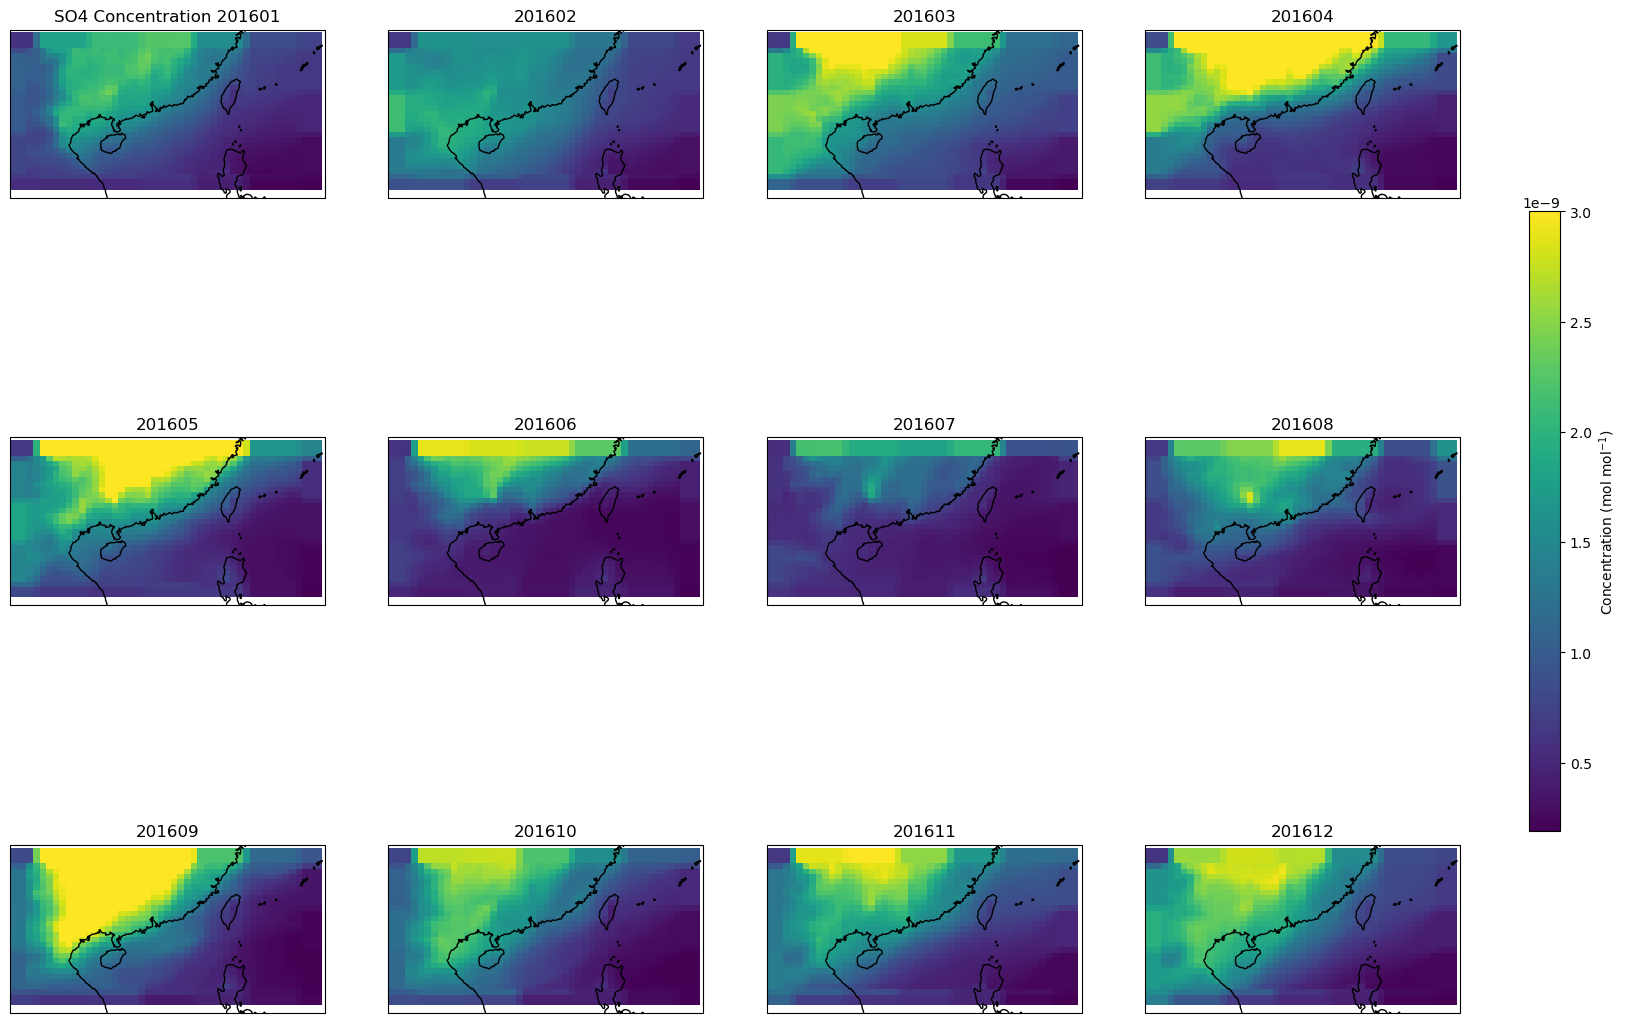

In [47]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['SO4 Concentration 201601', '201602', '201603', 
          '201604', '201605', '201606', 
          '201607', '201608', '201609','201610','201611','201612']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), so416, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=3e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 14, 30]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

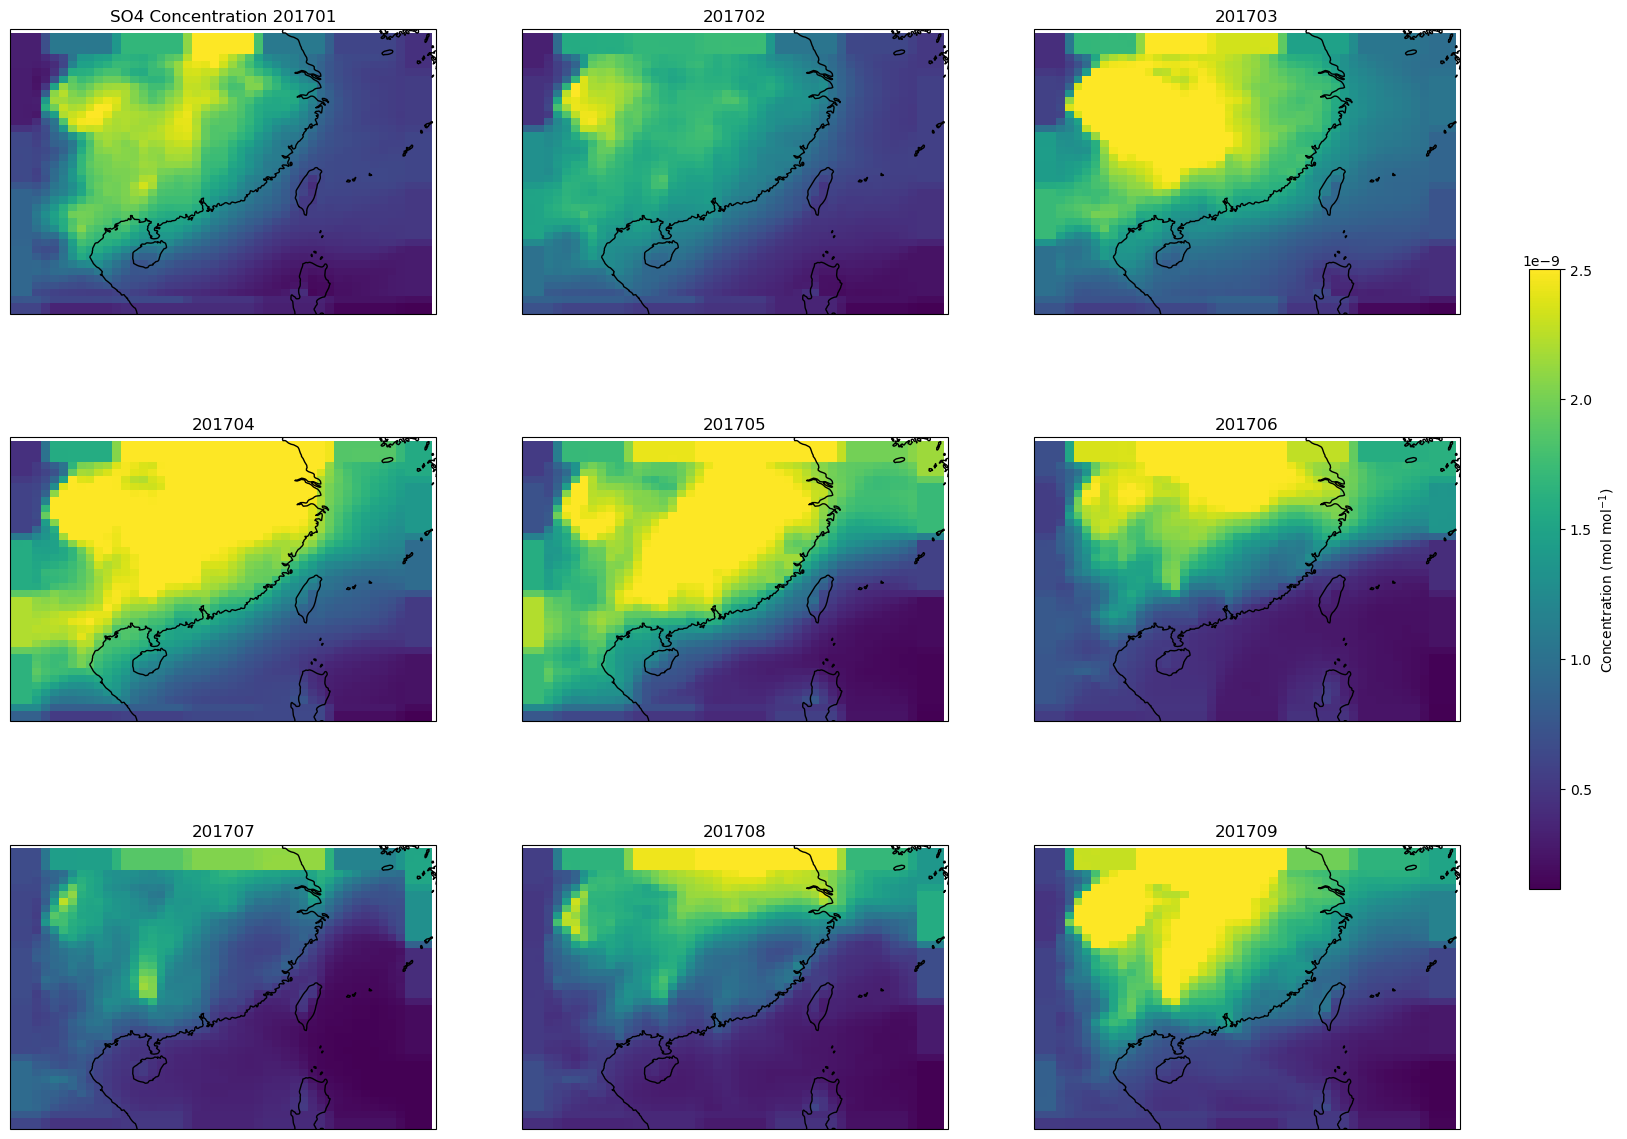

In [50]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

#Titles for the subplots (adjust as needed)
titles = ['SO4 Concentration 201701', '201702', '201703', 
          '201704', '201705', '201706', 
          '201707', '201708', '201709','201710','201711','201712']
# titles = ['SO4 Concentration 201701', '201702', '201703', '201704','201705','201706',
#           '201707', '201708', '201709']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), so417, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=2.5e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 15, 35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

In [55]:
nh316 = [0] *len(data16)

for i in range(len(nh316)):
    nh316[i] = data16[i]['SpeciesConcVV_NH3'].isel(time=0, lev=1)

In [57]:
nh317 = [0] *len(data17)

for i in range(len(nh317)):
    nh317[i] = data17[i]['SpeciesConcVV_NH3'].isel(time=0, lev=1)

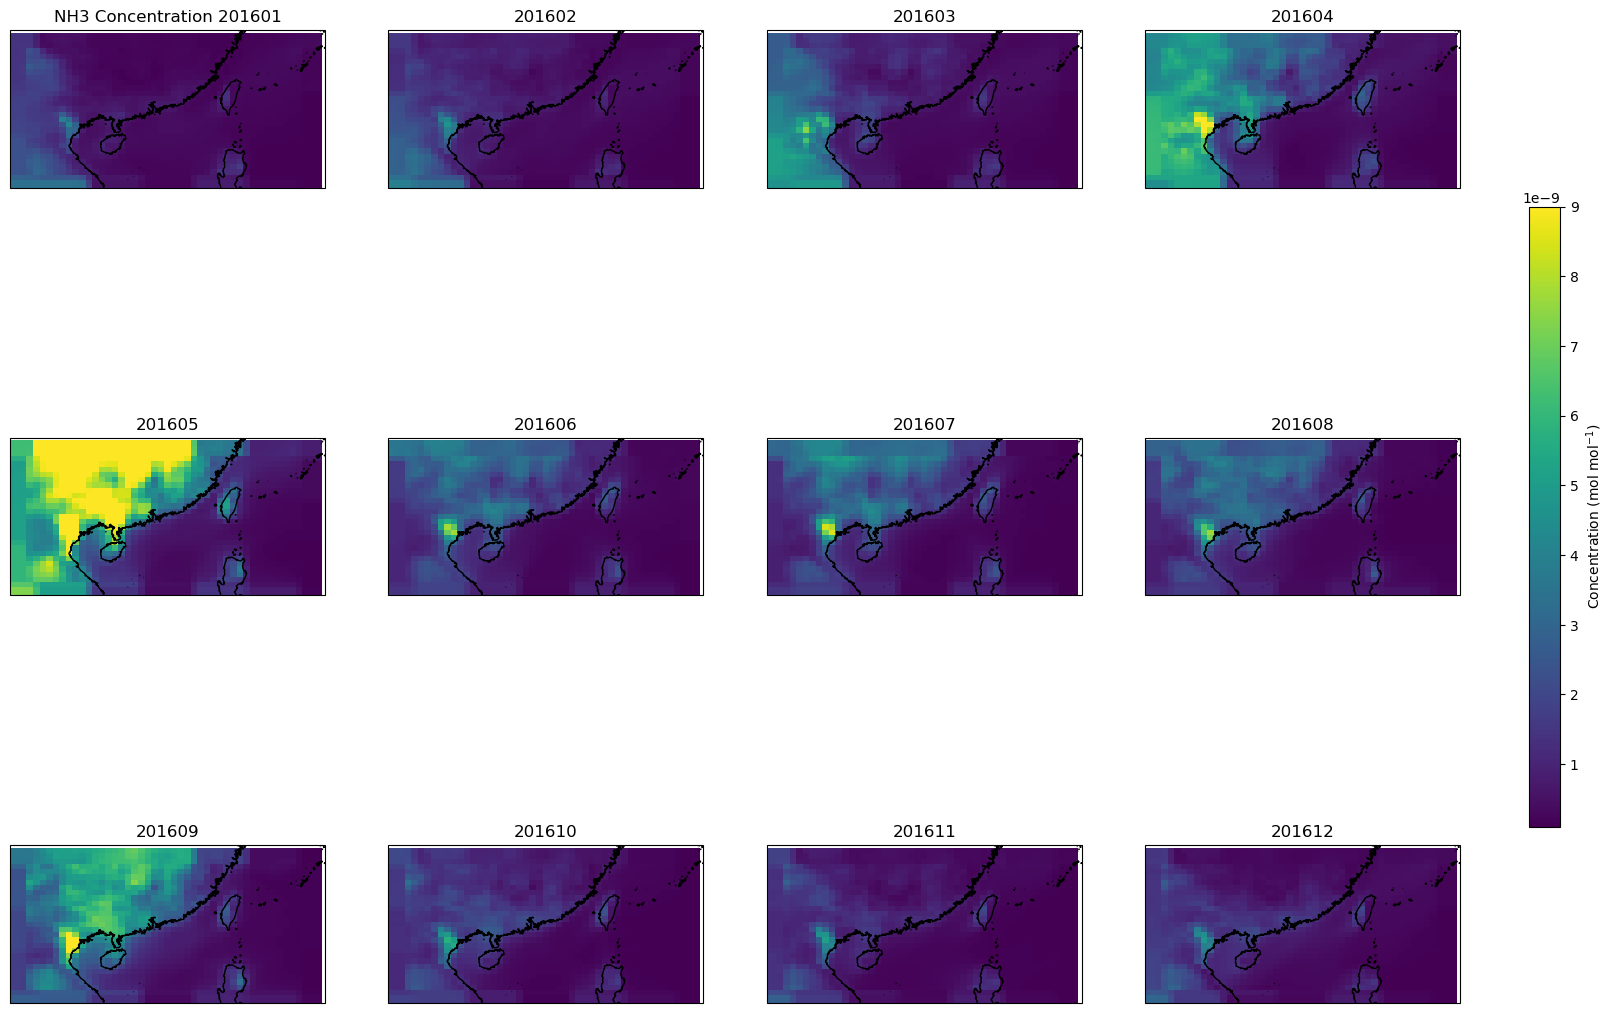

In [60]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 4, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['NH3 Concentration 201601', '201602', '201603', 
          '201604', '201605', '201606', 
          '201607', '201608', '201609','201610','201611','201612']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), nh316, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=9e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100,130, 15,30]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

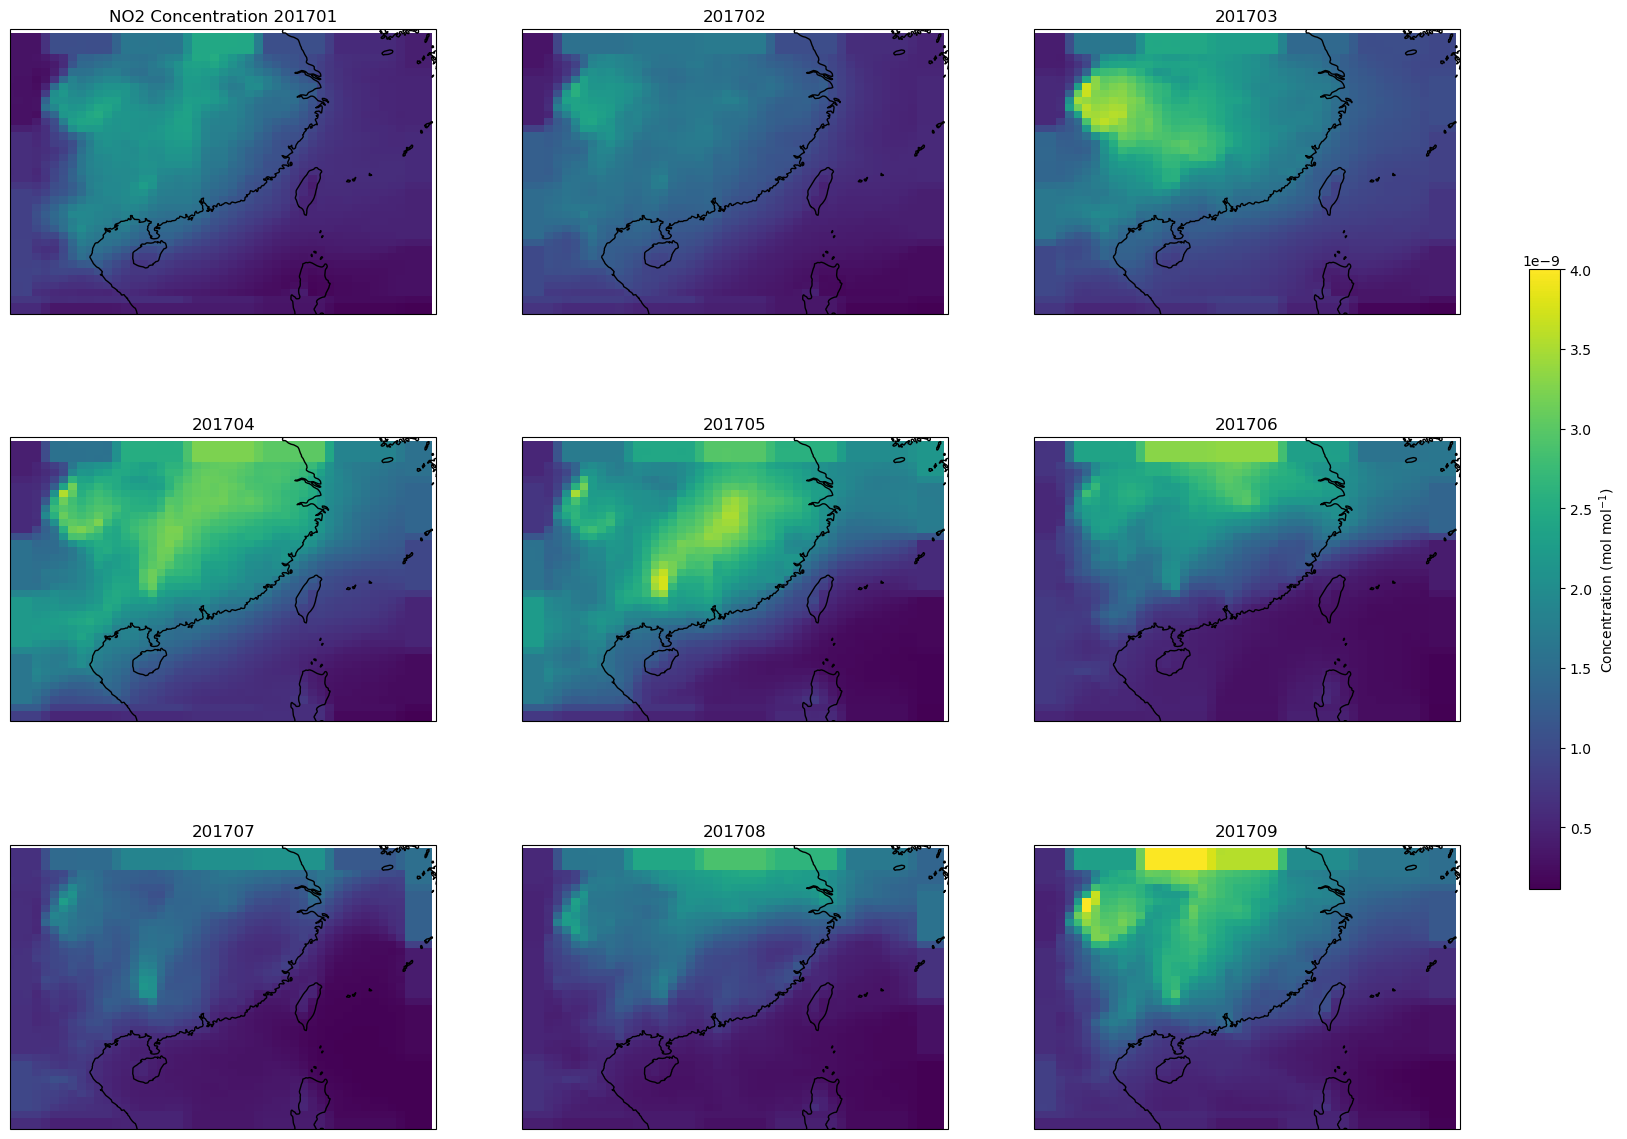

In [61]:
# Create a figure with 3 rows and 3 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 15), subplot_kw={'projection': ccrs.PlateCarree()})

# Titles for the subplots (adjust as needed)
titles = ['NO2 Concentration 201701', '201702', '201703', 
          '201704', '201705', '201706', 
          '201707', '201708', '201709','201710','201711','201712']
# titles = ['NH3 Concentration 201701', '201702', '201703', '201704','201705','201706',
#           '201707', '201708', '201709']

# Loop through each dataset and create a subplot
for ax, data, title in zip(axs.flatten(), so417, titles):
    # Plot the data on the map
    mesh = data.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis',vmax=4e-9, add_colorbar=False)
                     #cbar_kwargs={'label': 'Concentration (mol mol$^{-1}$)'})

    extent = [100, 130.0, 15, 35]
    ax.set_extent(extent, crs=ccrs.PlateCarree())

    # Set title and coastlines
    ax.set_title(title)
    ax.coastlines()
    #ax.gridlines()

# Create a single colorbar for all subplots
cbar = fig.colorbar(mesh, ax=axs, orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Concentration (mol mol$^{-1}$)')

# Adjust layout for better spacing
#plt.tight_layout
plt.subplots_adjust(right=0.85) 

# Show the plot
plt.show()

In [68]:
oc16 = [0] *len(data16)

for i in range(len(oc16)):
    oc16[i] = data16[i]['SpeciesConcVV_OCPO'].isel(time=0, lev=1) + data16[i]['SpeciesConcVV_OCPI'].isel(time=0, lev=1)

In [69]:
oc17 = [0] *len(data17)

for i in range(len(oc17)):
    oc17[i] = data17[i]['SpeciesConcVV_OCPO'].isel(time=0, lev=1) + data17[i]['SpeciesConcVV_OCPI'].isel(time=0, lev=1)

In [70]:
ocpo = [0] *len(data17)

for i in range(len(oc17)):
    ocpo[i] = data17[i]['SpeciesConcVV_OCPO'].isel(time=0, lev=1) 

ocpi = [0] *len(data17)

for i in range(len(oc17)):
    ocpi[i] = data17[i]['SpeciesConcVV_OCPI'].isel(time=0, lev=1) 


# diff = oc_diff[2].sel(lon=113, lat=23, method='nearest').values
# diff

In [71]:
#### 8.31
### module * (mass/22.4)


a = no216[2].sel(lon=113, lat=23, method='nearest').values
a

array(1.0762448e-08, dtype=float32)

In [72]:
observation.iloc[69:81,12]

69     6.772039
70     4.398505
71     8.340361
72    12.278279
73     8.197668
74     9.958453
75      6.94195
76     6.814409
77     6.662258
78     5.060698
79    10.330341
80    11.551442
Name: Unnamed: 12, dtype: object

In [73]:
obs_no2 = observation.iloc[:,12]

In [75]:
a*14/22.4

6.726529888645417e-09

In [78]:
'''
select moduled NO2 data closest to Baiyun station, (for 2016 and 2017)
convert units from mol/mol to ug/m3 or ug N/m3
'''


m_no2 = []

for i in range(len(no216)):
    x = no216[i].sel(lon=113, lat=23, method='nearest').values
    m_no2.append(x*14/22.4*10**9)

for i in range(len(no216)):
    x = no217[i].sel(lon=113, lat=23, method='nearest').values
    m_no2.append(x*14/22.4*10**9)

In [86]:
time = observation.iloc[69:93,1]

In [89]:
# t = range(0,24)
# plt.plot(time,observation.iloc[69:93,12], label = 'observation')
# plt.plot(time, m_no2, label = ' model')
# plt.legend()
# plt.title('NO2 observation vs. model')
# plt.ylabel('ug N /m3')

In [92]:
ob = observation.iloc[69:93,12]  # moduled NO2 from 2016 to 2017

res = []
for i in range(len(m_no2)):
    res.append(m_no2[i] - ob.tolist()[i])
    

In [94]:
par = []
for i in range(0,15):
    a = res[i]/observation.iloc[69:93,12].tolist()[i]
    par.append(a)
par
mean = sum(par)/len(par)
par
mean

-0.2016313779816983

In [96]:
t = range(len(res))

In [172]:
y_intep

array([7.16685045, 5.72655955, 6.63798058, 5.78085135, 4.97372995,
       5.14423698, 4.509614  , 5.4480115 , 5.71963921, 5.31384874,
       5.90319525, 6.1955373 , 6.91691093, 7.04732039, 5.98728192,
       5.53044645, 5.24249089, 5.42711198, 5.28438987, 6.40171717,
       4.85090671, 5.47981389, 4.70836527, 5.72333445, 4.68797112])

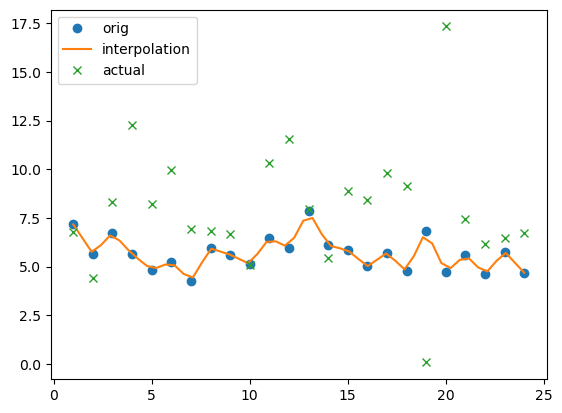

In [174]:
'''
Interpolation
'''


from scipy.interpolate import interp1d

#x=time
x=np.linspace(1,24,24)
mod=m_no2
actual=observation.iloc[69:93,12]

interp=interp1d(x,mod,kind='linear',bounds_error=False, fill_value="extrapolate")
x_new=np.linspace(1,24)
y_interp=interp(x_new)

plt.plot(x,mod,'o',label='orig')
plt.plot(x_new,y_interp,'-',label='interpolation')
plt.plot(x,actual,'x',label='actual')
plt.legend()
plt.show()

Text(0.5, 1.0, 'residual (module - observation)')

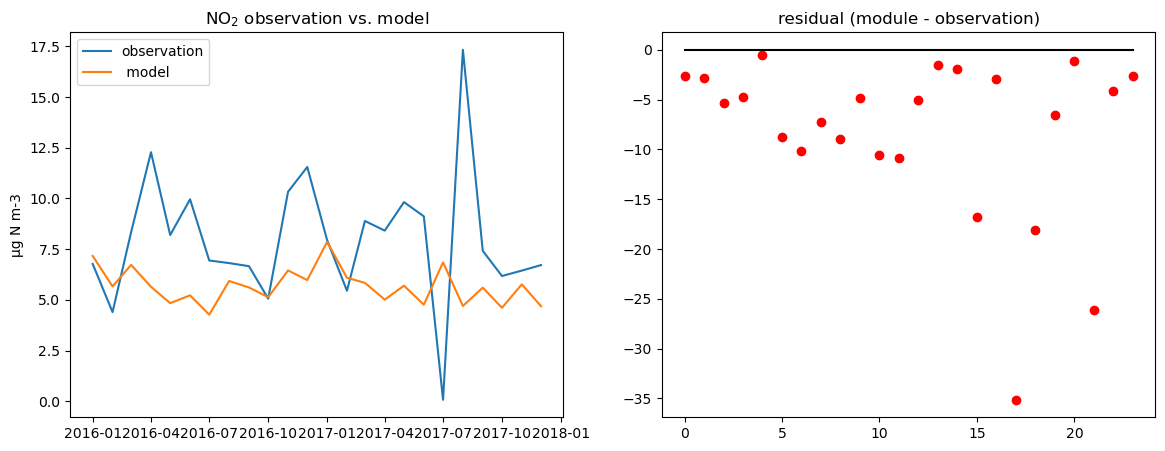

In [193]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(time,observation.iloc[69:93,12], label = 'observation')
plt.plot(time, m_no2, label = ' model')
plt.legend()
plt.title('NO$_2$ observation vs. model')
plt.ylabel('μg N m-3')

plt.subplot(1,2,2)
plt.scatter(t,res, c='red')
plt.plot([0]*24,c='black')
plt.title('residual (module - observation)')

for PM total

In [184]:
m_nh3 = []
for i in range(len(nh316)):
    x = nh316[i].sel(lon=113, lat=23, method='nearest').values
    m_nh3.append(x*14/22.4*10**9)


for i in range(len(nh316)):
    x = nh317[i].sel(lon=113, lat=23, method='nearest').values
    m_nh3.append(x*14/22.4*10**9)


ob = observation.iloc[69:93,8]  # moduled NO2 from 2016 to 2017
res = []
for i in range(len(m_nh3)):
    res.append(m_nh3[i] - ob.tolist()[i])

In [187]:
####   Calculate the average underestimation of the model
###

a=[]
for i in range(0,10):#len(res)):
    a.append(res[i]/observation.iloc[69+i,8])


ave = sum(a)/len(a)
ave



-0.7288060803380081

In [189]:
par = []
for i in range(0,12):
    a = res[i]/ob.tolist()[i]
    par.append(a)
par
mean = sum(par)/len(par)
mean

-0.760778014177784

Text(0.5, 1.0, 'residual (module - observation)')

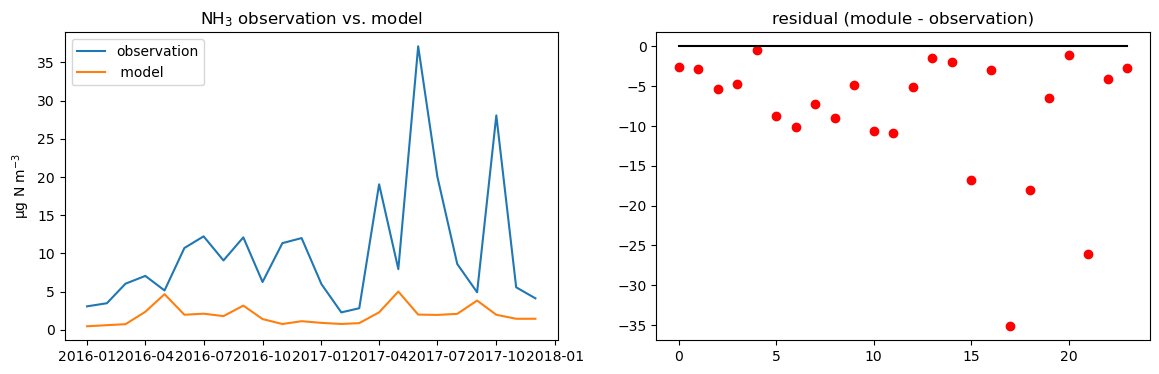

In [201]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(time,observation.iloc[69:93,8], label = 'observation')
plt.plot(time, m_nh3, label = ' model')
plt.legend()
plt.title('NH$_3$ observation vs. model')
plt.ylabel('μg N m$^{-3}$')

plt.subplot(1,2,2)
plt.scatter(t,res, c='red')
plt.plot([0]*24,c='black')
plt.title('residual (module - observation)')

In [349]:
m_no3 = []
for i in range(len(no316)):
    x = no316[i].sel(lon=113, lat=23, method='nearest').values
    m_no3.append(x*14/22.4*10**9)

for i in range(len(no316)):
    x = no317[i].sel(lon=113, lat=23, method='nearest').values
    m_no3.append(x*14/22.4*10**9)

ob = observation.iloc[69:93,11]  # moduled NO2 from 2016 to 2017
res = []
for i in range(len(m_no3)):
    #print(i)
    res.append(m_no3[i] - ob.tolist()[i])

In [353]:
par = []
for i in range(len(m_no3)):
    a = res[i]/observation.iloc[69:93,11].tolist()[i]
    par.append(a)
par
mean = sum(par)/len(par)
mean

40.12842758150927

In [355]:
observation.iloc[:3,11]

0       pNO3-
1    2.715152
2    3.304414
Name: Unnamed: 11, dtype: object

Text(0.5, 1.0, 'residual (module - observation)')

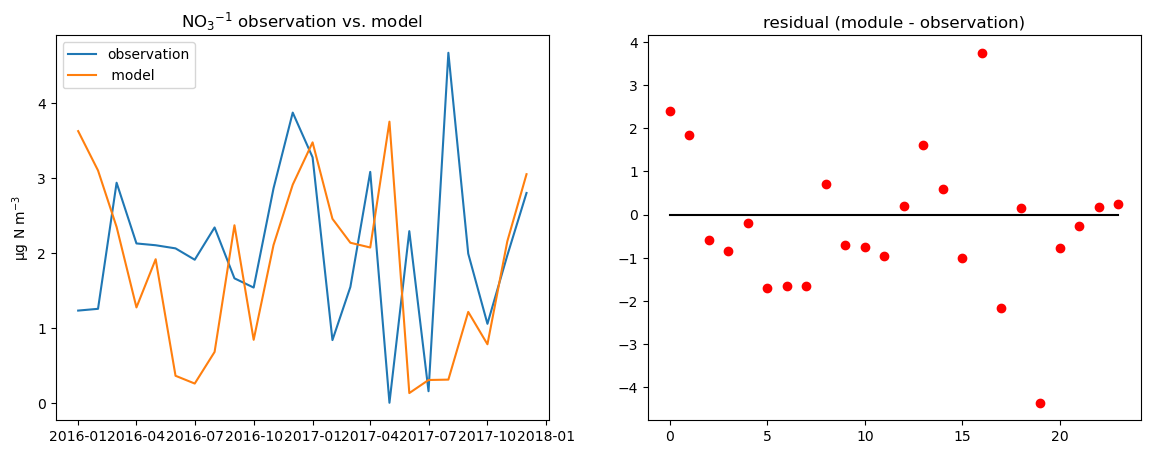

In [357]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(time,observation.iloc[69:93,11], label = 'observation')
plt.plot(time, m_no3, label = ' model')
plt.legend()
plt.title('NO$_3$$^{-1}$ observation vs. model')
plt.ylabel('μg N m$^{-3}$')

plt.subplot(1,2,2)
plt.scatter(t,res, c='red')
#plt.xlim(2016,2017)
plt.plot([0]*24,c='black')
plt.title('residual (module - observation)')

In [333]:
'''
HNO3, nitric acid
'''

m_hno3 = []
for i in range(len(hno316)):
    x = hno316[i].sel(lon=113, lat=23, method='nearest').values
    m_hno3.append(x*14/22.4*10**9)

for i in range(len(hno317)):
    x = hno317[i].sel(lon=113, lat=23, method='nearest').values
    m_hno3.append(x*14/22.4*10**9)

ob = observation.iloc[69:93,9]  # moduled NO2 from 2016 to 2017
res = []
for i in range(len(m_hno3)):
    #print(i)
    res.append(m_hno3[i] - ob.tolist()[i])

In [335]:
par = []
for i in range(len(m_hno3)):
    a = res[i]/observation.iloc[69:93,9].tolist()[i]
    par.append(a)
par
mean = sum(par)/len(par)
mean

4.802703624288479

Text(0.5, 1.0, 'residual (module - observation)')

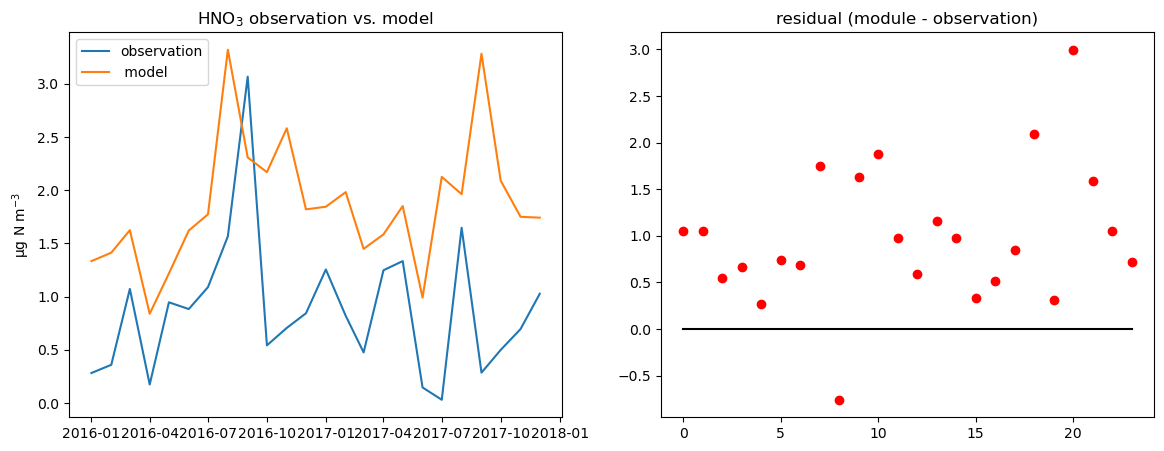

In [337]:
plt.figure(figsize=(14, 5))

plt.subplot(1,2,1)
plt.plot(time,observation.iloc[69:93,9], label = 'observation')
plt.plot(time, m_hno3, label = ' model')
plt.legend()
plt.title('HNO$_3$ observation vs. model')
plt.ylabel('μg N m$^{-3}$')

plt.subplot(1,2,2)
plt.scatter(t,res, c='red')
#plt.xlim(2016,2017)
plt.plot([0]*24,c='black')
plt.title('residual (module - observation)')

In [321]:
# o = observation.iloc[69:93,9]
# m = []
# for i in range(0,15):
#     a = m_hno3[i]/o[i]
#     m.append(a)


In [209]:
NO3_pm17 = PM.iloc[96:,6]
SO4_pm17 = PM.iloc[96:,7]
OC_pm17 = PM.iloc[96:,8]
OM_pm17 = PM.iloc[96:,20]

T = PM.iloc[96:,1]

In [339]:
m_so4 = []
# for i in range(len(no316)):
#     x = no316[i].sel(lon=113, lat=23, method='nearest').values
#     m_no3.append(x*14/22.4*10**9)

for i in range(len(so417)):
    x = so417[i].sel(lon=113, lat=23, method='nearest').values
    m_so4.append(x*(32+32)/22.4*10**9)

#ob = observation.iloc[69:93,9]  # moduled NO2 from 2016 to 2017
res = []
for i in range(len(m_so4)):
    #print(i)
    res.append(m_so4[i] - SO4_pm17.tolist()[i])

In [341]:
SO4_pm17.iloc[3]

7.08532622642619

In [343]:
####   Calculate the average underestimation of the model
###

a=[]
for i in range(len(res)):
    a.append(res[i]/OC_pm17.iloc[i])


ave = sum(a)/len(a)
ave

-0.3620969664908962

Text(0.5, 1.0, 'residual (module - observation)')

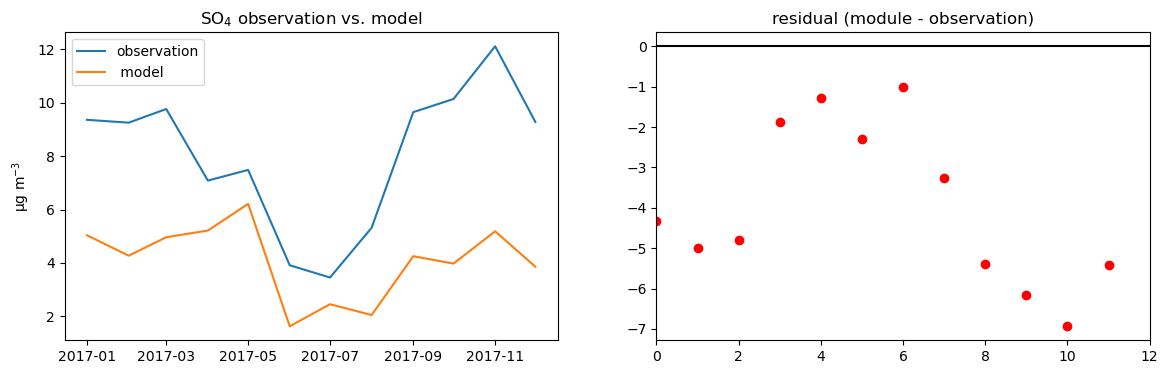

In [345]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(T,SO4_pm17, label = 'observation')
plt.plot(T, m_so4, label = ' model')
plt.legend()
plt.title('SO$_4$ observation vs. model')
plt.ylabel('μg m$^{-3}$')

plt.subplot(1,2,2)
plt.scatter(range(0,12),res, c='red')
plt.xlim(0,12)
plt.plot([0]*24,c='black')
plt.title('residual (module - observation)')

In [347]:
par = []
for i in range(len(m_so4)):
    a = res[i]/SO4_pm17.tolist()[i]
    par.append(a)
par
mean = sum(par)/len(par)
par
mean

-0.4784201103045809

In [221]:
m_oc = []
# for i in range(len(no316)):
#     x = no316[i].sel(lon=113, lat=23, method='nearest').values
#     m_no3.append(x*14/22.4*10**9)

for i in range(len(oc17)):
    x = oc17[i].sel(lon=113, lat=23, method='nearest').values
    m_oc.append(x*(12)/22.4*10**9)

#ob = observation.iloc[69:93,9]  # moduled NO2 from 2016 to 2017
res = []
for i in range(len(m_oc)):
    #print(i)
    res.append(m_oc[i] - OC_pm17.tolist()[i])

Text(0.5, 1.0, 'residual (module - observation)')

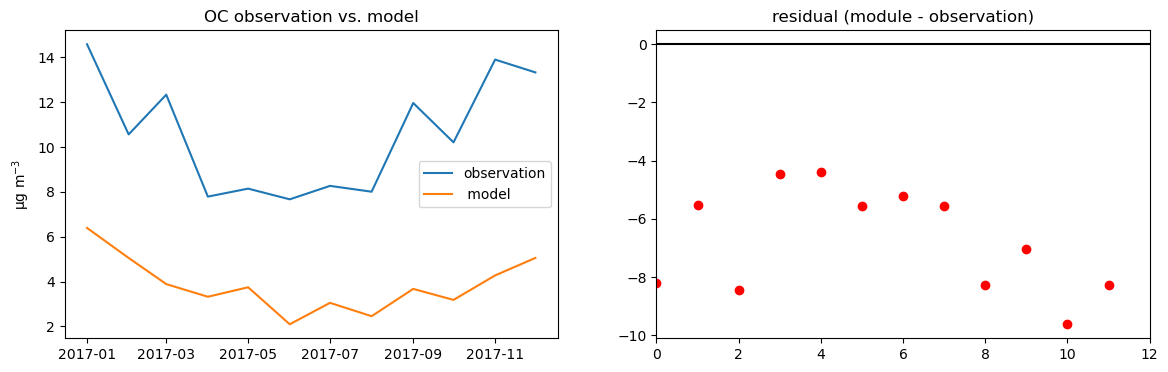

In [223]:
plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(T,OC_pm17, label = 'observation')
plt.plot(T, m_oc, label = ' model')
plt.legend()
plt.title('OC observation vs. model')
plt.ylabel('μg m$^{-3}$')

plt.subplot(1,2,2)
plt.scatter(range(0,12),res, c='red')
plt.xlim(0,12)
plt.plot([0]*24,c='black')
plt.title('residual (module - observation)')

In [225]:
par = []
for i in range(len(m_so4)):
    a = res[i]/OC_pm17.tolist()[i]
    par.append(a)
par
mean = sum(par)/len(par)
mean

-0.6356598242132939

In [ ]:


    # # Set title and coastlines
    # ax.set_title(title)
    # ax.coastlines()

    # ax.scatter(113,23,color='r')
    # #ax.gridlines()

## Interpolation_Sample

/Users/hrd/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrd/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrd/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 32467 (\N{CJK UNIFIED IDEOGRAPH-7ED3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrd/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 26524 (\N{CJK UNIFIED IDEOGRAPH-679C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/hrd/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 25554 (\N{CJK UNIFIED IDEOGRAPH-63D

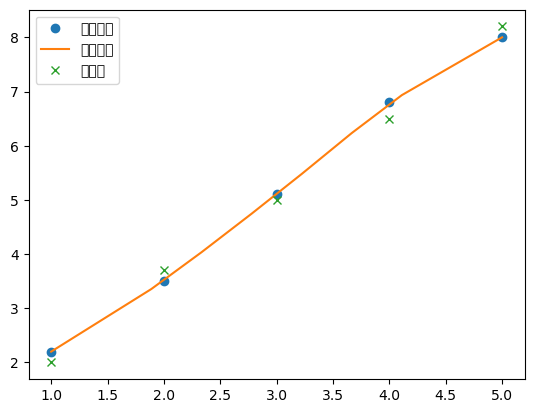

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 示例数据
x = np.array([1, 2, 3, 4, 5])
y_model = np.array([2.2, 3.5, 5.1, 6.8, 8.0])  # 模型结果
y_actual = np.array([2.0, 3.7, 5.0, 6.5, 8.2])  # 实际值

# 插值
interp_func = interp1d(x, y_model, kind='linear')
x_new = np.linspace(1, 5, 10)
y_interp = interp_func(x_new)

# 绘图比较
plt.plot(x, y_model, 'o', label='模型结果')
plt.plot(x_new, y_interp, '-', label='插值结果')
plt.plot(x, y_actual, 'x', label='实际值')
plt.legend()
plt.show()